# Chargement des librairies

In [103]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
%load_ext google.colab.data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [104]:
#%pip install regex==2021.8.3
#%pip install regex==2022.1.18
#%pip install bokeh==3.2.0
#%pip install bokeh ==2.0.5
#%pip install typing-extensions
#%pip install typing-extensions==4.3.0
#%pip install cohere
#%pip install openai
#%pip install tiktoken
#%pip install sqlalchemy==2.0.23
#%pip install python-multipart
#%pip install uvicorn
#%pip install fastapi
#%pip install kaleido

%pip install lida




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: regex
    Found existing installation: regex 2021.11.10
    Uninstalling regex-2021.11.10:
      Successfully uninstalled regex-2021.11.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataprep 0.4.5 requires regex<2022.0.0,>=2021.8.3, but you have regex 2023.12.25 which is incompatible.


In [105]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
#%pip install sqlalchemy==1.3.24
!pip install -U git+https://github.com/sfu-db/dataprep.git@develop --quiet
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
%pip install kneed
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tiktoken 0.5.2 requires regex>=2022.1.18, but you have regex 2021.11.10 which is incompatible.


# Chargement des données et examen du dataset

In [106]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 9/volaille2017.csv', index_col=0)
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 9/volaille2017-filtré.csv', index_col=0) # pour utiliser une version du fichier sans les pays trop instable et/où n'important pas de poulet


In [107]:
df.head()


Zone  Quantite_exporte_de_france  Stabilite_politique  \
0     Afghanistan                         0.0                -2.80   
1  Afrique du Sud                         0.0                -0.28   
2         Albanie                       440.0                 0.38   
3         Algérie                     51470.0                -0.92   
4       Allemagne                   1313490.0                 0.59   

   PIB_par_hab_2017_euro  Evo_PIB_5ans  Dispo_alim(Kg/Pers/an)  \
0                 498.34    -20.054736                    1.53   
1                6330.41    -17.609702                   35.69   
2                4259.17      6.671974                   16.36   
3                3886.84    -26.303107                    6.38   
4               41973.43      1.816712                   19.47   

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0              5.700000e+07             1.321852e+08               29000000.0   
1              2.118000e+09             6.300000e+07              514000000.0   
2              4.700000e+07             0.000000e+00               38000000.0   
3              2.770000e+08             0.000000e+00                2000000.0   
4              1.739000e+09             6.460000e+08              842000000.0   

   Nourriture_total    Production  Distance_france  Droit de douane   tva  \
0      5.500000e+07  2.800000e+07        5590.3810             7.02   0.0   
1      2.035000e+09  1.667000e+09        9353.5520             4.51  15.0   
2      4.700000e+07  1.300000e+07        1603.5340             0.85  20.0   
3      2.640000e+08  2.750000e+08        1340.3900             8.85  19.0   
4      1.609000e+09  1.514000e+09         439.8984             1.79  19.0   

   taux_impot_sur_vente  Doing_business_index  
0                  10.0                 44.06  
1                  15.0                 67.02  
2                  20.0                 67.75  
3                  19.0                 48.60  
4                  19.0                 79.71

Description du dataset :
* Zone : pays
* Quantite_exporte_de_france : quantité de poulet exporté par la france en kg
* Stabilité politique : indice de stabilité politique
* PIB_par_hab_2017_euro : PIB par habitant pour l'année 2017 en euro
* Evo_PIB_5ans : Evolution du PIB/habitant de 2012 à 2017
* Dispo_alim(kg/Pers/an) : Quantité de nourriture disponible pour la consommation huamine d'un pays en Kg par personne et par an
* Disponibilité intérieure : Quantité de nourriture disponible pour la consommation humaine d'un pays après avoir pris en compte les exportations en kg
* Exportation - quantité : Exportation de poulet du pays en kg
* Importations - quantité : Importation de poulet par pays en kg
* Nourriture_total : Poids de poulets total disponible pour la nourriture humaine du pays en kg
* Production :Poids de poulet produit par le pays en kg
* Distance_france : Distance entre la capitale du pays et Paris en km
* Droit de douane : Montant des droit de douane en %
* tva : TVA en %
* Taux_impot_sur_vente :Taux d'impot sur les ventes en %
* Doing_business_index :Plus l'index est élevé, plus il est facile de faire du business avec un pays

In [108]:
#renommage de la colonne tonnage exporte et evo_PIB_5anspour quelle soit plus explicite
df.rename(columns={'tonnage exporte':'tonnage exporte de France', 'Evo_PIB_5ans':'Evolution PIB/Habitant'}, inplace = True)

on vérifie qu'il n'y a pas de problème apparent dans les données

In [109]:
df.shape

(170, 16)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zone                        170 non-null    object 
 1   Quantite_exporte_de_france  170 non-null    float64
 2   Stabilite_politique         170 non-null    float64
 3   PIB_par_hab_2017_euro       170 non-null    float64
 4   Evolution PIB/Habitant      170 non-null    float64
 5   Dispo_alim(Kg/Pers/an)      170 non-null    float64
 6   Disponibilité intérieure    170 non-null    float64
 7   Exportations - Quantité     170 non-null    float64
 8   Importations - Quantité     170 non-null    float64
 9   Nourriture_total            170 non-null    float64
 10  Production                  170 non-null    float64
 11  Distance_france             170 non-null    float64
 12  Droit de douane             170 non-null    float64
 13  tva                         170 non

In [111]:
df.isna().mean()

Zone                          0.0
Quantite_exporte_de_france    0.0
Stabilite_politique           0.0
PIB_par_hab_2017_euro         0.0
Evolution PIB/Habitant        0.0
Dispo_alim(Kg/Pers/an)        0.0
Disponibilité intérieure      0.0
Exportations - Quantité       0.0
Importations - Quantité       0.0
Nourriture_total              0.0
Production                    0.0
Distance_france               0.0
Droit de douane               0.0
tva                           0.0
taux_impot_sur_vente          0.0
Doing_business_index          0.0
dtype: float64

In [112]:
df.duplicated().sum()

0

In [113]:
df.nunique()

Zone                          170
Quantite_exporte_de_france     61
Stabilite_politique           133
PIB_par_hab_2017_euro         170
Evolution PIB/Habitant        170
Dispo_alim(Kg/Pers/an)        167
Disponibilité intérieure      135
Exportations - Quantité        51
Importations - Quantité        84
Nourriture_total              130
Production                    126
Distance_france               169
Droit de douane               134
tva                            31
taux_impot_sur_vente           30
Doing_business_index          159
dtype: int64

In [114]:
df = df.set_index('Zone')

In [115]:
X = df.values
X[:5]

array([[ 0.00000000e+00, -2.80000000e+00,  4.98340000e+02,
        -2.00547364e+01,  1.53000000e+00,  5.70000000e+07,
         1.32185185e+08,  2.90000000e+07,  5.50000000e+07,
         2.80000000e+07,  5.59038100e+03,  7.02000000e+00,
         0.00000000e+00,  1.00000000e+01,  4.40600000e+01],
       [ 0.00000000e+00, -2.80000000e-01,  6.33041000e+03,
        -1.76097019e+01,  3.56900000e+01,  2.11800000e+09,
         6.30000000e+07,  5.14000000e+08,  2.03500000e+09,
         1.66700000e+09,  9.35355200e+03,  4.51000000e+00,
         1.50000000e+01,  1.50000000e+01,  6.70200000e+01],
       [ 4.40000000e+02,  3.80000000e-01,  4.25917000e+03,
         6.67197378e+00,  1.63600000e+01,  4.70000000e+07,
         0.00000000e+00,  3.80000000e+07,  4.70000000e+07,
         1.30000000e+07,  1.60353400e+03,  8.50000000e-01,
         2.00000000e+01,  2.00000000e+01,  6.77500000e+01],
       [ 5.14700000e+04, -9.20000000e-01,  3.88684000e+03,
        -2.63031074e+01,  6.38000000e+00,  2.77000000

suppression de \xa0 des donnés

In [116]:
X.shape

(170, 15)

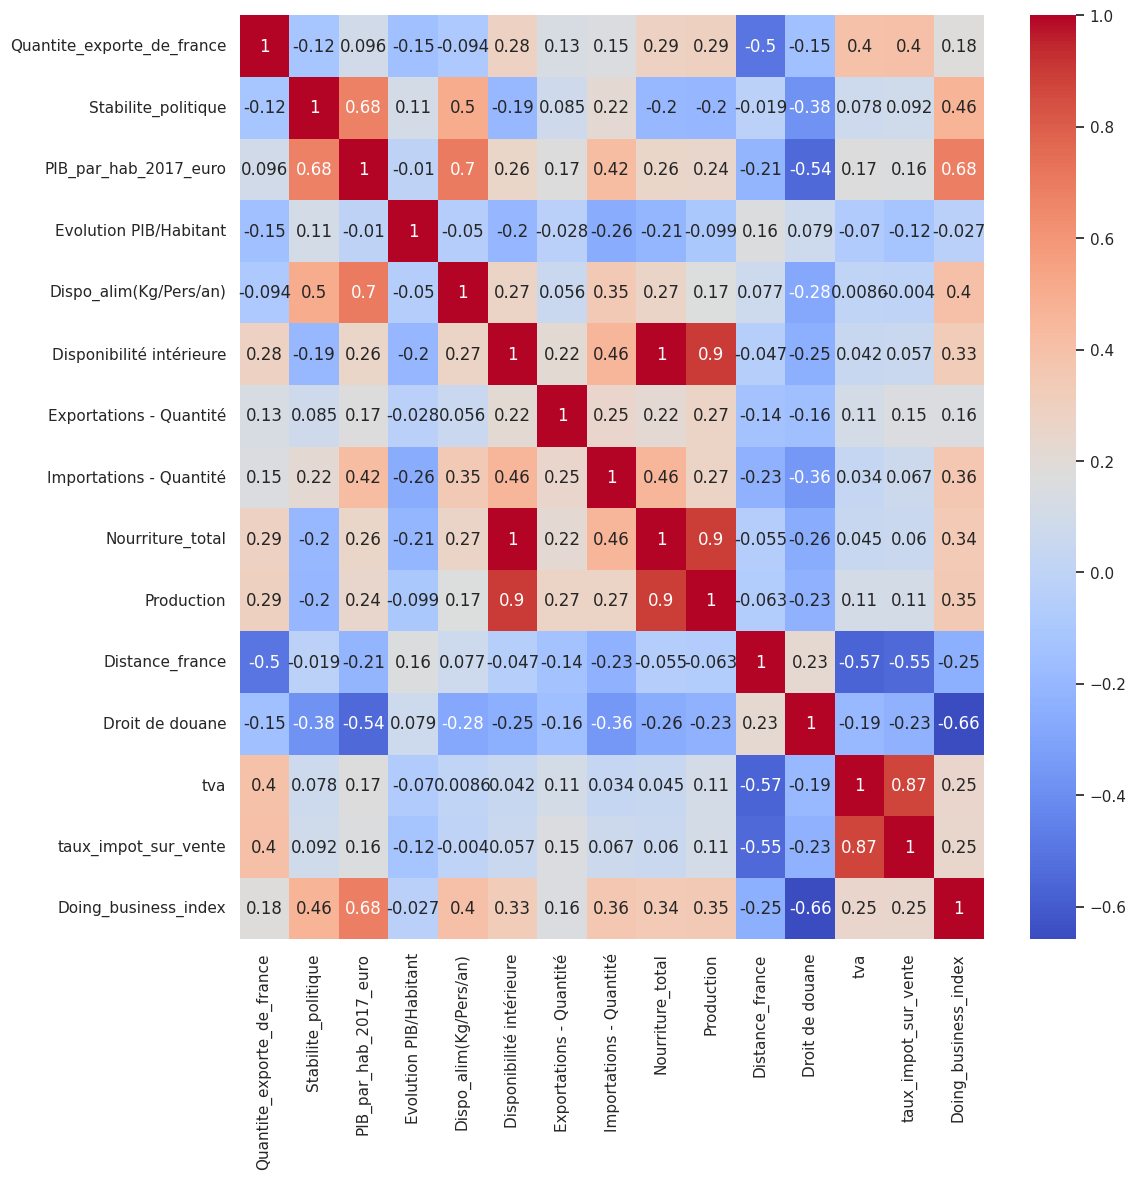

In [117]:
# regardons s'il y a des sorrelations entre les variables selon Spearman (aucune des données ne suis la loi normale)
fig, ax = plt.subplots(figsize=(12, 12))
corr = df.corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Analyse PCA

In [118]:
#enregistrement du nom des pays
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=170)

In [119]:
# enregistrement du nom des colonnes
features = df.columns
features

Index(['Quantite_exporte_de_france', 'Stabilite_politique',
       'PIB_par_hab_2017_euro', 'Evolution PIB/Habitant',
       'Dispo_alim(Kg/Pers/an)', 'Disponibilité intérieure',
       'Exportations - Quantité', 'Importations - Quantité',
       'Nourriture_total', 'Production', 'Distance_france', 'Droit de douane',
       'tva', 'taux_impot_sur_vente', 'Doing_business_index'],
      dtype='object')

scaling des donnés : on va centrer réduire les données

In [120]:
scaler = StandardScaler()

In [121]:
scaler.fit(X)

StandardScaler()

In [122]:
X_scaled = scaler.transform(X)

In [123]:
#vérification que les moyennes sont bien à 0 et les ecartypes à 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0 -0.0  0.0  0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       14  
mean -0.0  
std   1.0

In [124]:
# selection du nombre des composantes à étudier
n_components = 14

In [125]:
pca = PCA(n_components=n_components)

In [126]:
pca.fit(X_scaled)

PCA(n_components=14)

In [127]:
# variance pour chaque axes principales d'inertie
pca.explained_variance_ratio_

array([2.64714184e-01, 1.84645167e-01, 1.37036733e-01, 8.03552430e-02,
       6.82523578e-02, 6.35216304e-02, 4.58114886e-02, 4.54160607e-02,
       3.26948492e-02, 2.58916058e-02, 2.19772244e-02, 1.85951873e-02,
       1.09173307e-02, 1.21417686e-04])

In [128]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([2.647e+01, 1.846e+01, 1.370e+01, 8.040e+00, 6.830e+00, 6.350e+00,
       4.580e+00, 4.540e+00, 3.270e+00, 2.590e+00, 2.200e+00, 1.860e+00,
       1.090e+00, 1.000e-02])

In [129]:
# affichage du cumul de la variance
scree_cum = scree.cumsum().round()
scree_cum

array([ 26.,  45.,  59.,  67.,  73.,  80.,  84.,  89.,  92.,  95.,  97.,
        99., 100., 100.])

In [130]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

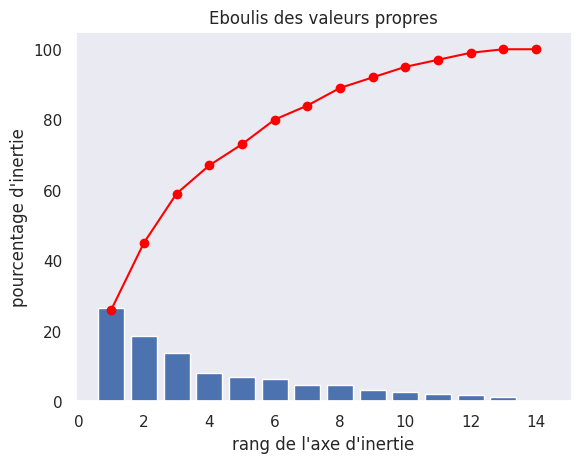

In [131]:
#Affichage de l'éboulis des valeurs propres afin de déterminer combien d'axe principaux d'inertie il faut prendre en considération pour expliquer au moins 80% de la variation
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

L'éboulis des valeurs propres montre que 7 composantes principales expliquent 85% de l'inertie. Noius allons donc considérer les 7 premiers axes

In [132]:
# détermination des composantes linéaires pour chaque composantes principales
pcs = pca.components_

In [133]:
# on crée un dataframe de ces composantes linéaires
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6   \
0   0.054104  0.118812  0.215999 -0.027170  0.206297  0.450133  0.382972   
1  -0.150669 -0.357315 -0.378067  0.078879 -0.143120  0.214579  0.119901   
2  -0.096175  0.301782  0.196733  0.060312  0.341158 -0.103804 -0.147648   
3   0.424074 -0.323050  0.011699 -0.408415 -0.216621 -0.026059 -0.041040   
4   0.549485  0.055541  0.094372  0.764820 -0.253475 -0.025407  0.100890   
5   0.545615  0.229504  0.036291 -0.296338  0.362699 -0.087963  0.252552   
6   0.293528 -0.018343 -0.217932 -0.228428 -0.266574  0.001879  0.085588   
7  -0.001840  0.057493 -0.327211  0.204836  0.030516  0.051806 -0.208731   
8   0.090586 -0.438767 -0.378868  0.194359  0.668187 -0.103381  0.137948   
9   0.274198 -0.000049 -0.228245 -0.085029  0.104267  0.204620 -0.588600   
10  0.073978 -0.506361  0.610987  0.081424  0.169212  0.099426 -0.315457   
11  0.092361  0.387328 -0.169355  0.035721  0.132304  0.184243 -0.358878   
12  0.045672 -0.066567  0.095708 -0.052727 -0.048410  0.049288 -0.275322   
13 -0.000741  0.000903  0.000532 -0.002194  0.004947  0.049345 -0.112752   

          7         8         9         10        11        12        13  \
0   0.202824  0.451894  0.455258 -0.015171 -0.163554  0.044675 -0.064808   
1  -0.110542  0.214851  0.214879  0.264262  0.366146 -0.258361 -0.297960   
2   0.114563 -0.102829 -0.123593  0.371821 -0.059137 -0.516147 -0.498061   
3   0.551494 -0.025272 -0.069710 -0.230261 -0.122659 -0.302120 -0.162830   
4  -0.013739 -0.026378 -0.002720 -0.069164  0.023716 -0.061449 -0.126215   
5  -0.084548 -0.080228 -0.029799  0.219052  0.424988  0.172326  0.078474   
6  -0.409769 -0.005712  0.042503  0.494033 -0.535691 -0.064911  0.045021   
7   0.620410  0.037816 -0.033193  0.511183  0.007992  0.205001  0.326627   
8  -0.041303 -0.098781 -0.065736 -0.167966 -0.293456  0.048998 -0.070040   
9  -0.216765  0.188033  0.092219 -0.140459  0.337164 -0.080110 -0.011756   
10 -0.119330  0.088697  0.032185  0.266791 -0.047845 -0.061833  0.290742   
11 -0.050943  0.176809  0.088881 -0.232457 -0.366675 -0.137122  0.114701   
12  0.027570  0.028359 -0.006488  0.085429 -0.126030  0.679913 -0.631565   
13  0.045850 -0.687958  0.713519 -0.006989  0.000738 -0.010762  0.005987   

          14  
0   0.240698  
1  -0.394440  
2   0.114797  
3  -0.063816  
4   0.010373  
5  -0.280182  
6   0.168573  
7   0.054402  
8   0.065956  
9   0.485270  
10 -0.187606  
11 -0.607489  
12 -0.122570  
13 -0.011054

In [134]:
# on ajoute les noms des colonnes et le nom des composantes principales
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Quantite_exporte_de_france  Stabilite_politique  PIB_par_hab_2017_euro  \
F1                         0.05                 0.12                   0.22   
F2                        -0.15                -0.36                  -0.38   
F3                        -0.10                 0.30                   0.20   
F4                         0.42                -0.32                   0.01   
F5                         0.55                 0.06                   0.09   
F6                         0.55                 0.23                   0.04   
F7                         0.29                -0.02                  -0.22   
F8                        -0.00                 0.06                  -0.33   
F9                         0.09                -0.44                  -0.38   
F10                        0.27                -0.00                  -0.23   
F11                        0.07                -0.51                   0.61   
F12                        0.09                 0.39                  -0.17   
F13                        0.05                -0.07                   0.10   
F14                       -0.00                 0.00                   0.00   

     Evolution PIB/Habitant  Dispo_alim(Kg/Pers/an)  Disponibilité intérieure  \
F1                    -0.03                    0.21                      0.45   
F2                     0.08                   -0.14                      0.21   
F3                     0.06                    0.34                     -0.10   
F4                    -0.41                   -0.22                     -0.03   
F5                     0.76                   -0.25                     -0.03   
F6                    -0.30                    0.36                     -0.09   
F7                    -0.23                   -0.27                      0.00   
F8                     0.20                    0.03                      0.05   
F9                     0.19                    0.67                     -0.10   
F10                   -0.09                    0.10                      0.20   
F11                    0.08                    0.17                      0.10   
F12                    0.04                    0.13                      0.18   
F13                   -0.05                   -0.05                      0.05   
F14                   -0.00                    0.00                      0.05   

     Exportations - Quantité  Importations - Quantité  Nourriture_total  \
F1                      0.38                     0.20              0.45   
F2                      0.12                    -0.11              0.21   
F3                     -0.15                     0.11             -0.10   
F4                     -0.04                     0.55             -0.03   
F5                      0.10                    -0.01             -0.03   
F6                      0.25                    -0.08             -0.08   
F7                      0.09                    -0.41             -0.01   
F8                     -0.21                     0.62              0.04   
F9                      0.14                    -0.04             -0.10   
F10                    -0.59                    -0.22              0.19   
F11                    -0.32                    -0.12              0.09   
F12                    -0.36                    -0.05              0.18   
F13                    -0.28                     0.03              0.03   
F14                    -0.11                     0.05             -0.69   

     Production  Distance_france  Droit de douane   tva  taux_impot_sur_vente  \
F1         0.46            -0.02            -0.16  0.04                 -0.06   
F2         0.21             0.26             0.37 -0.26                 -0.30   
F3        -0.12             0.37            -0.06 -0.52                 -0.50   
F4        -0.07            -0.23            -0.12 -0.30                 -0.16   
F5        -0.00            -0.07             0.02 -0.06                 

In [135]:
#on transpose le données
pcst = pcs.T.round(2)
pcst

F1    F2    F3    F4    F5    F6    F7    F8  \
Quantite_exporte_de_france  0.05 -0.15 -0.10  0.42  0.55  0.55  0.29 -0.00   
Stabilite_politique         0.12 -0.36  0.30 -0.32  0.06  0.23 -0.02  0.06   
PIB_par_hab_2017_euro       0.22 -0.38  0.20  0.01  0.09  0.04 -0.22 -0.33   
Evolution PIB/Habitant     -0.03  0.08  0.06 -0.41  0.76 -0.30 -0.23  0.20   
Dispo_alim(Kg/Pers/an)      0.21 -0.14  0.34 -0.22 -0.25  0.36 -0.27  0.03   
Disponibilité intérieure    0.45  0.21 -0.10 -0.03 -0.03 -0.09  0.00  0.05   
Exportations - Quantité     0.38  0.12 -0.15 -0.04  0.10  0.25  0.09 -0.21   
Importations - Quantité     0.20 -0.11  0.11  0.55 -0.01 -0.08 -0.41  0.62   
Nourriture_total            0.45  0.21 -0.10 -0.03 -0.03 -0.08 -0.01  0.04   
Production                  0.46  0.21 -0.12 -0.07 -0.00 -0.03  0.04 -0.03   
Distance_france            -0.02  0.26  0.37 -0.23 -0.07  0.22  0.49  0.51   
Droit de douane            -0.16  0.37 -0.06 -0.12  0.02  0.42 -0.54  0.01   
tva                         0.04 -0.26 -0.52 -0.30 -0.06  0.17 -0.06  0.21   
taux_impot_sur_vente       -0.06 -0.30 -0.50 -0.16 -0.13  0.08  0.05  0.33   
Doing_business_index        0.24 -0.39  0.11 -0.06  0.01 -0.28  0.17  0.05   

                              F9   F10   F11   F12   F13   F14  
Quantite_exporte_de_france  0.09  0.27  0.07  0.09  0.05 -0.00  
Stabilite_politique        -0.44 -0.00 -0.51  0.39 -0.07  0.00  
PIB_par_hab_2017_euro      -0.38 -0.23  0.61 -0.17  0.10  0.00  
Evolution PIB/Habitant      0.19 -0.09  0.08  0.04 -0.05 -0.00  
Dispo_alim(Kg/Pers/an)      0.67  0.10  0.17  0.13 -0.05  0.00  
Disponibilité intérieure   -0.10  0.20  0.10  0.18  0.05  0.05  
Exportations - Quantité     0.14 -0.59 -0.32 -0.36 -0.28 -0.11  
Importations - Quantité    -0.04 -0.22 -0.12 -0.05  0.03  0.05  
Nourriture_total           -0.10  0.19  0.09  0.18  0.03 -0.69  
Production                 -0.07  0.09  0.03  0.09 -0.01  0.71  
Distance_france            -0.17 -0.14  0.27 -0.23  0.09 -0.01  
Droit de douane            -0.29  0.34 -0.05 -0.37 -0.13  0.00  
tva                         0.05 -0.08 -0.06 -0.14  0.68 -0.01  
taux_impot_sur_vente       -0.07 -0.01  0.29  0.11 -0.63  0.01  
Doing_business_index        0.07  0.49 -0.19 -0.61 -0.12 -0.01

In [136]:
#analyse exploratoire des données avec la librairie dataprep

report = create_report(pcst, title='My Report')
report

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

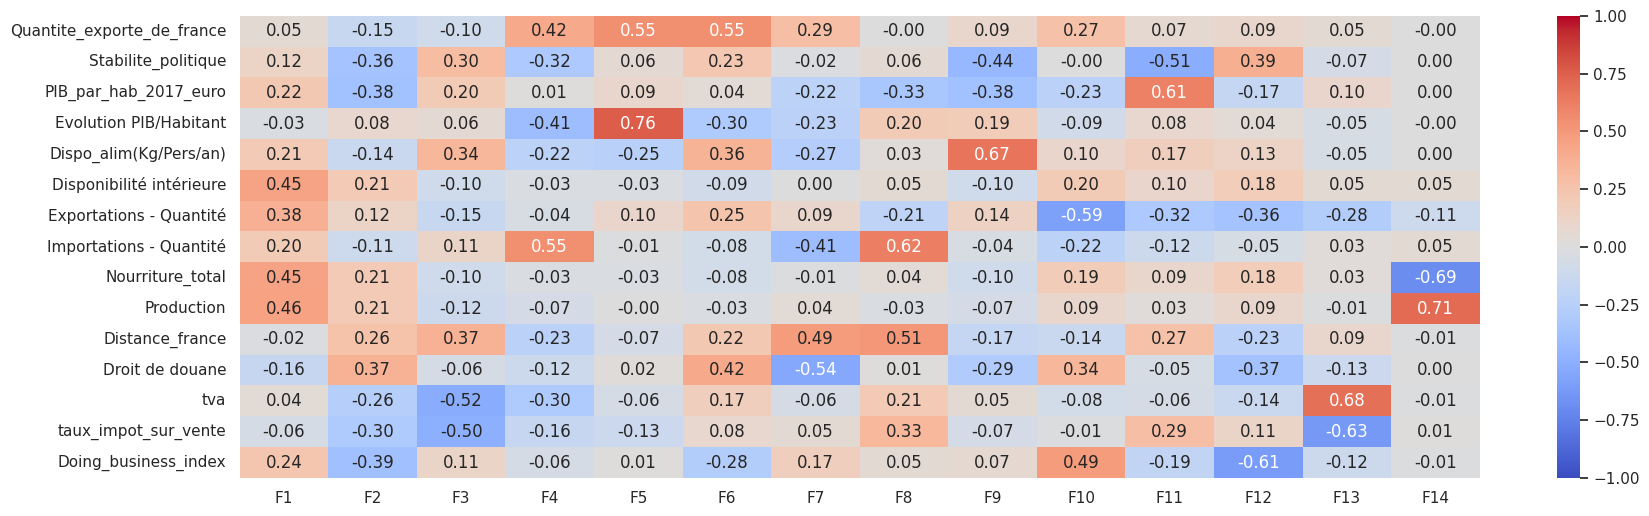

In [137]:
# Représentation visuelles des donnés sous forme de heatmap afin d'avoir une meilleure représention des notions s'exprimant le plus sur les axes princcipaux d'inertie
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcst, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Fonction permettant de tracer les cercles de correlation

In [138]:
def correlation_graph(pca,
                      x_y,
                      features) :# code repris du cours d'Openclassroom
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.02,
                head_length=0.02,
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.01,
                pca.components_[y, i] + 0.01,
                features[i], fontsize=8)

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [139]:
#projetion des données sur les axes principaux de l'ACP
X_proj = pca.transform(X_scaled)
#X_proj[:5]

Fonction permettant d'afficher les plans factoriels

In [140]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):# code repris du cours d'openclassroom
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



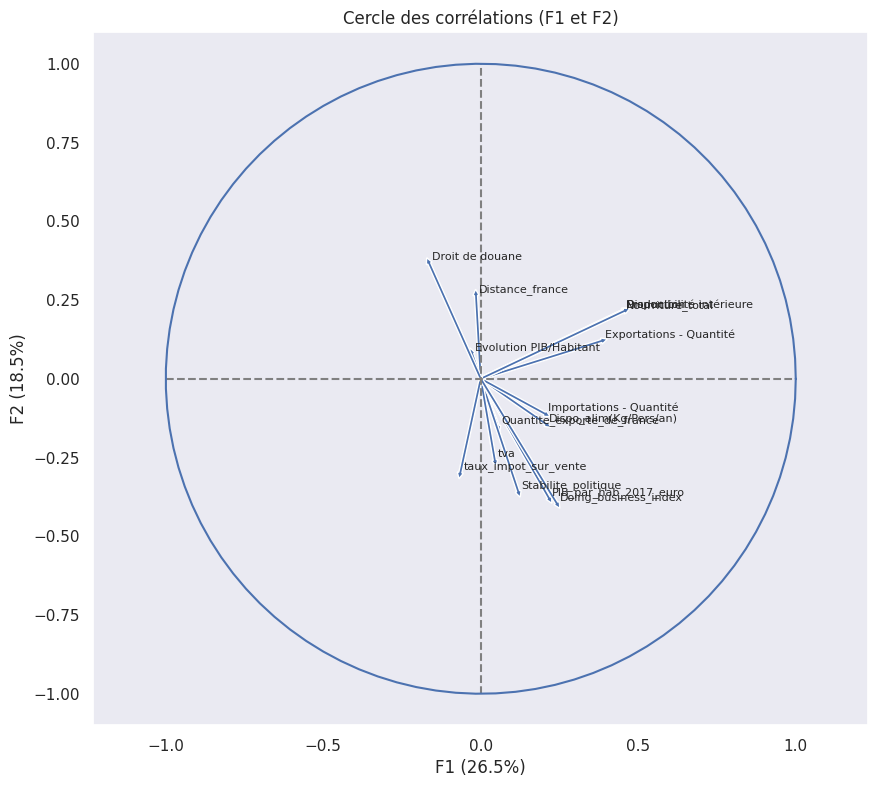

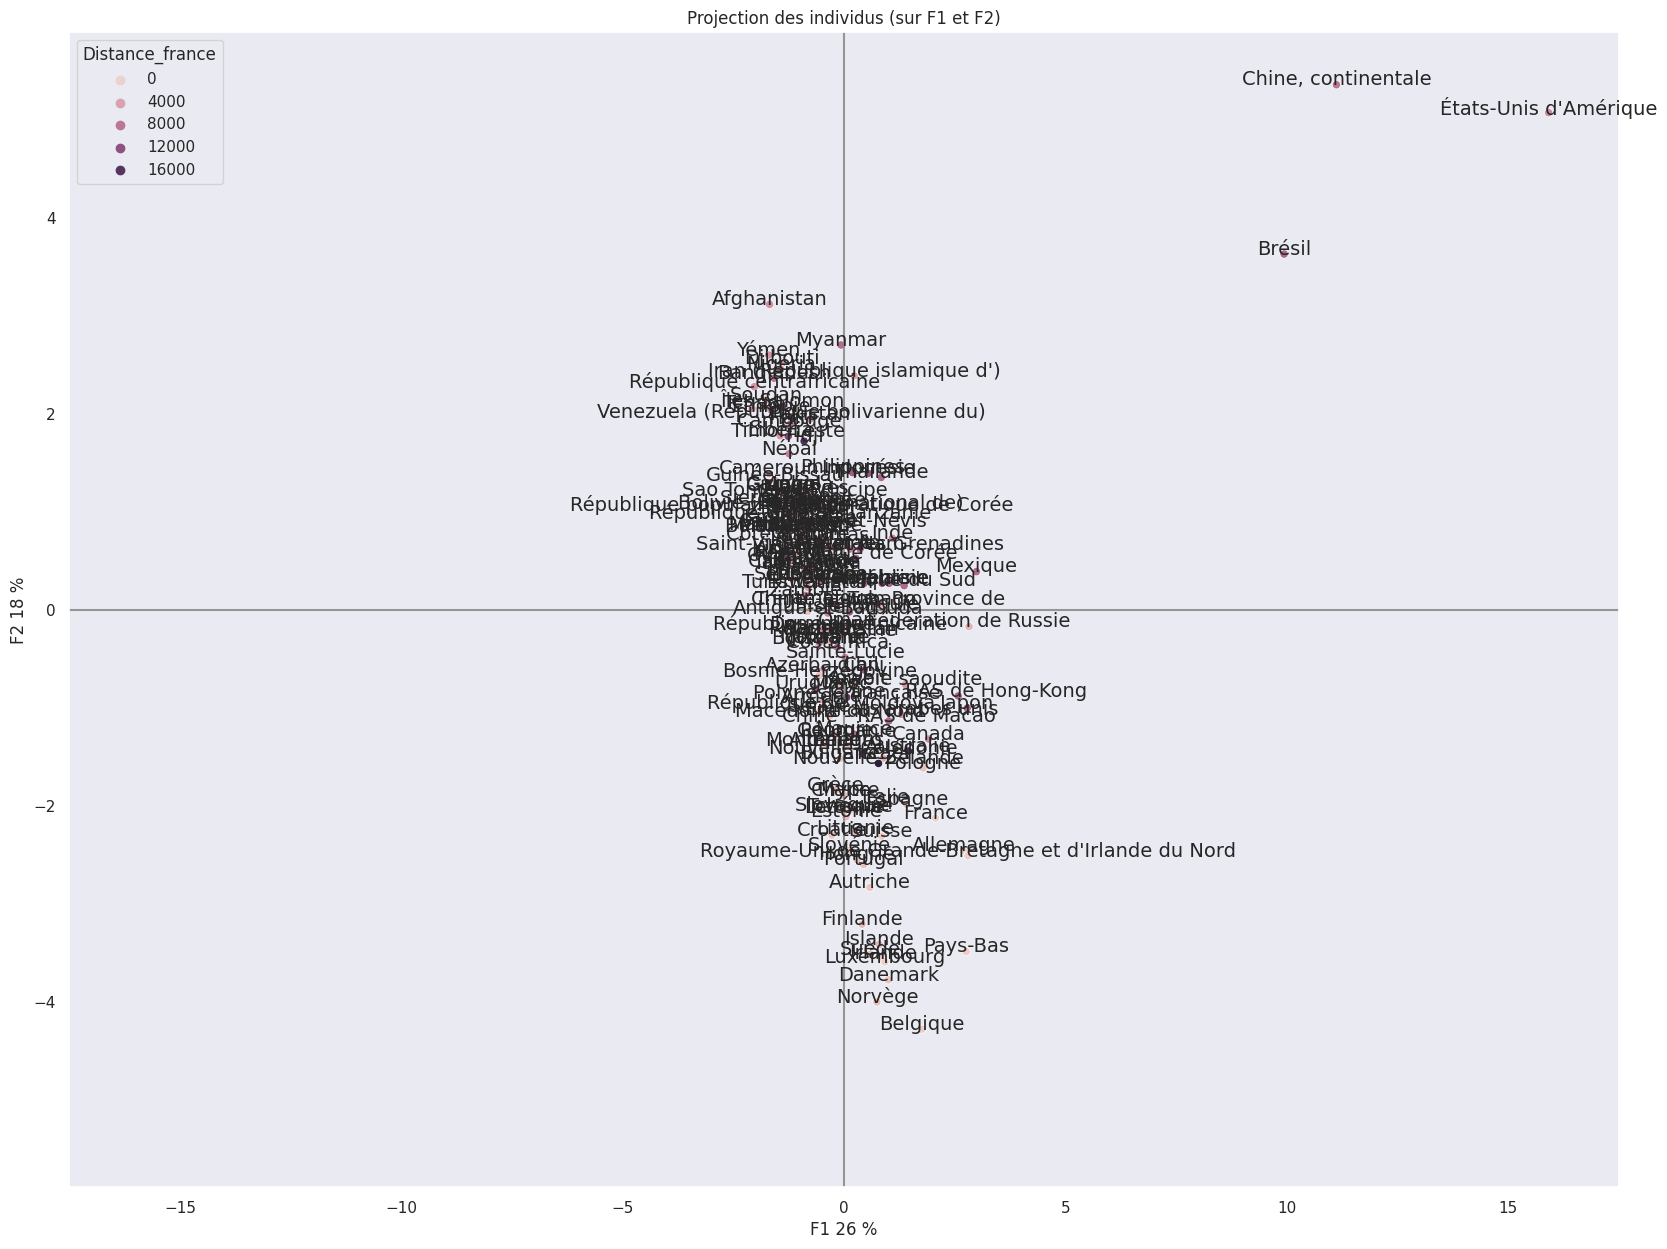

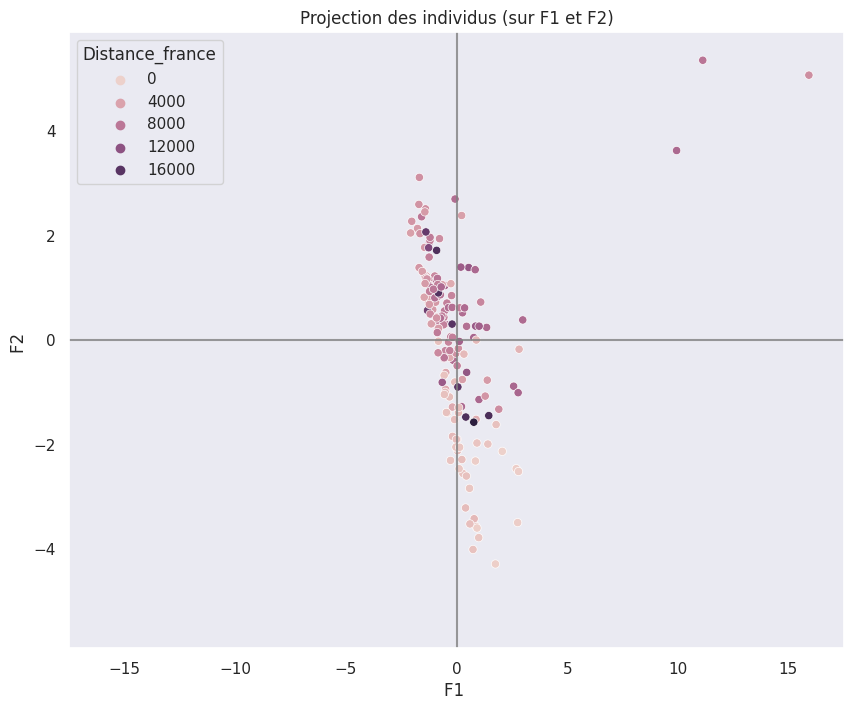

In [141]:
# examinons les projections sur F1 et F2
x_y = [0,1] #F1 et F2
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'], marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


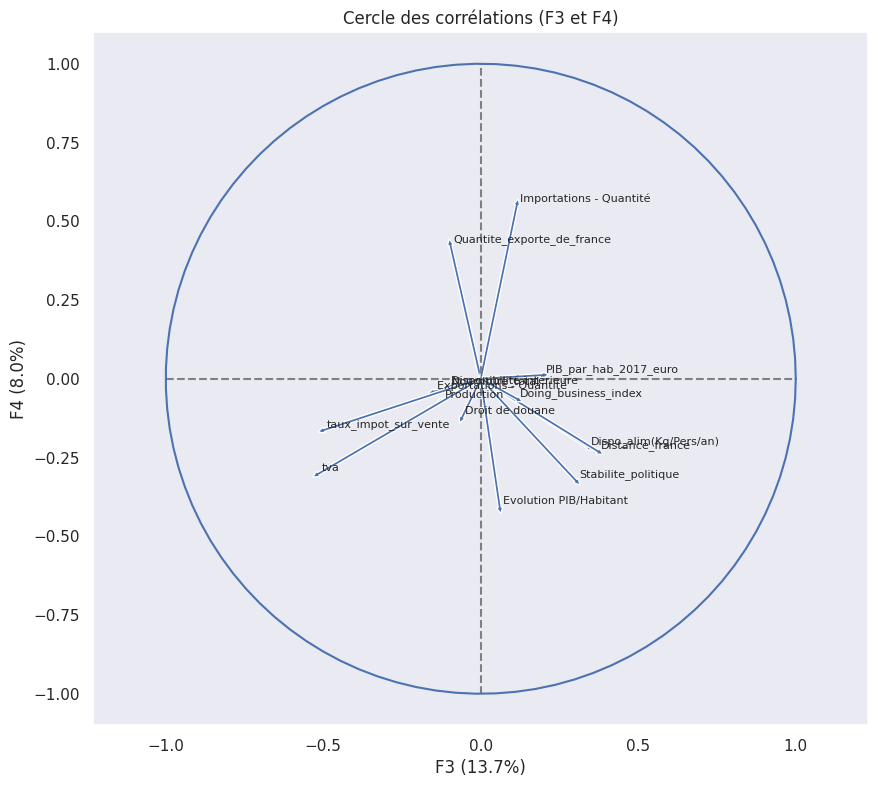

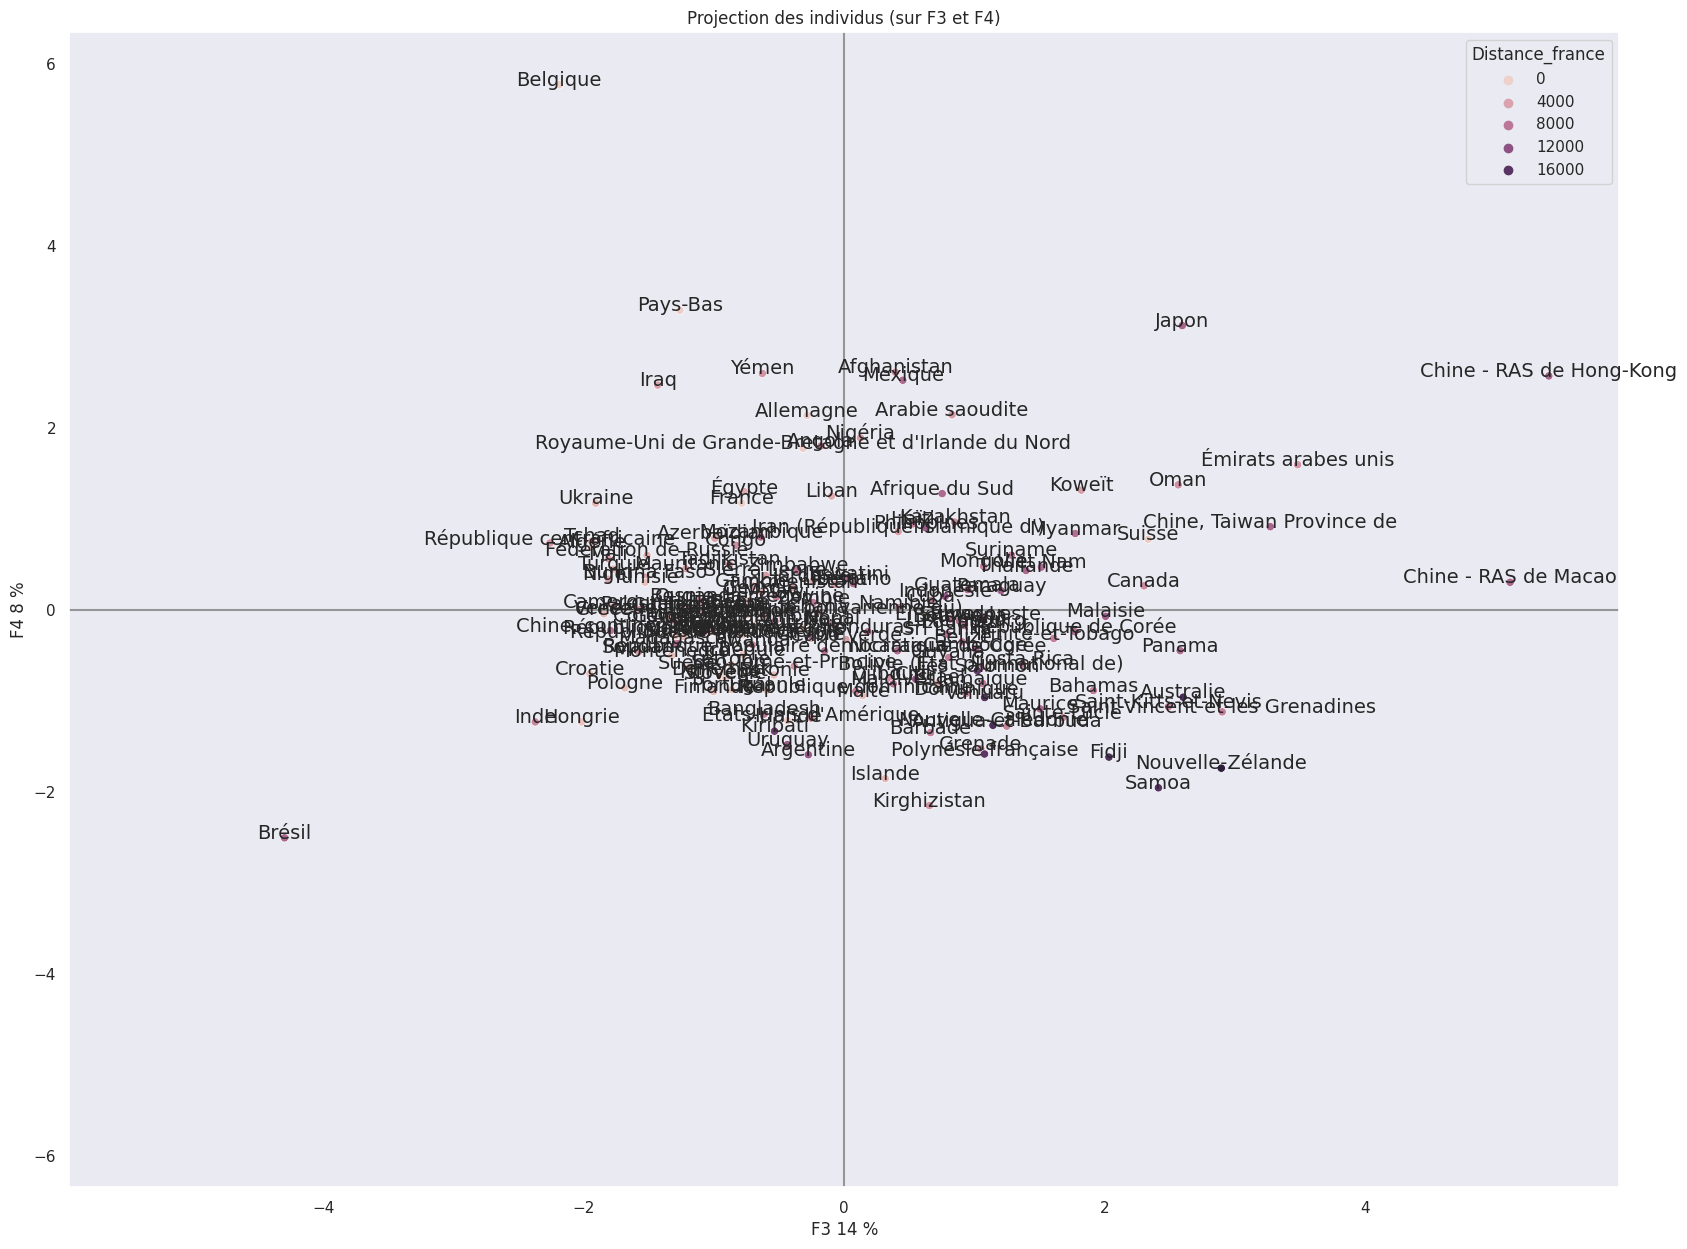

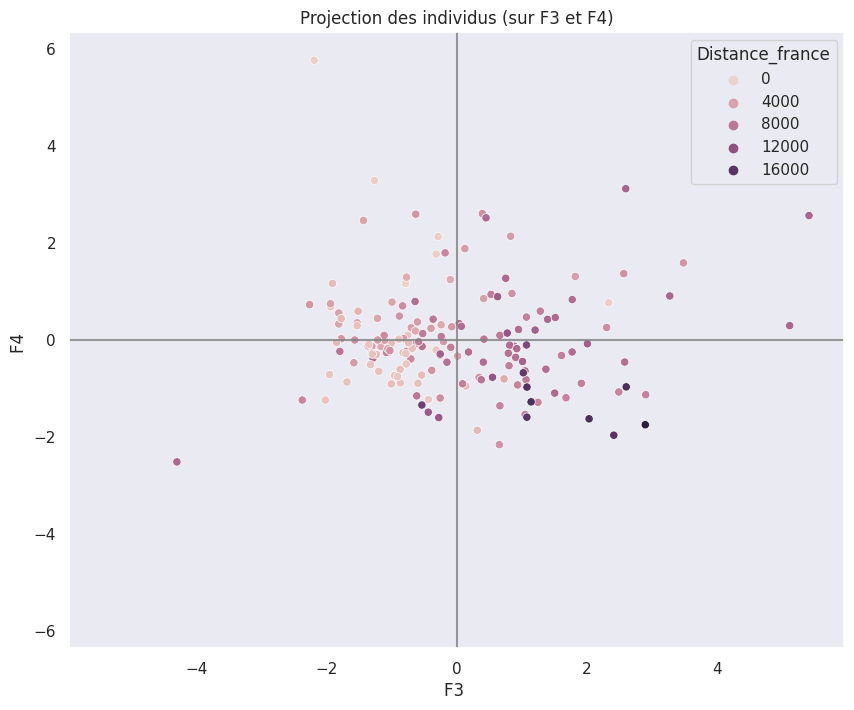

In [142]:
# examinons maintenant les projectionns sur F3 et F4
x_y = 2,3
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


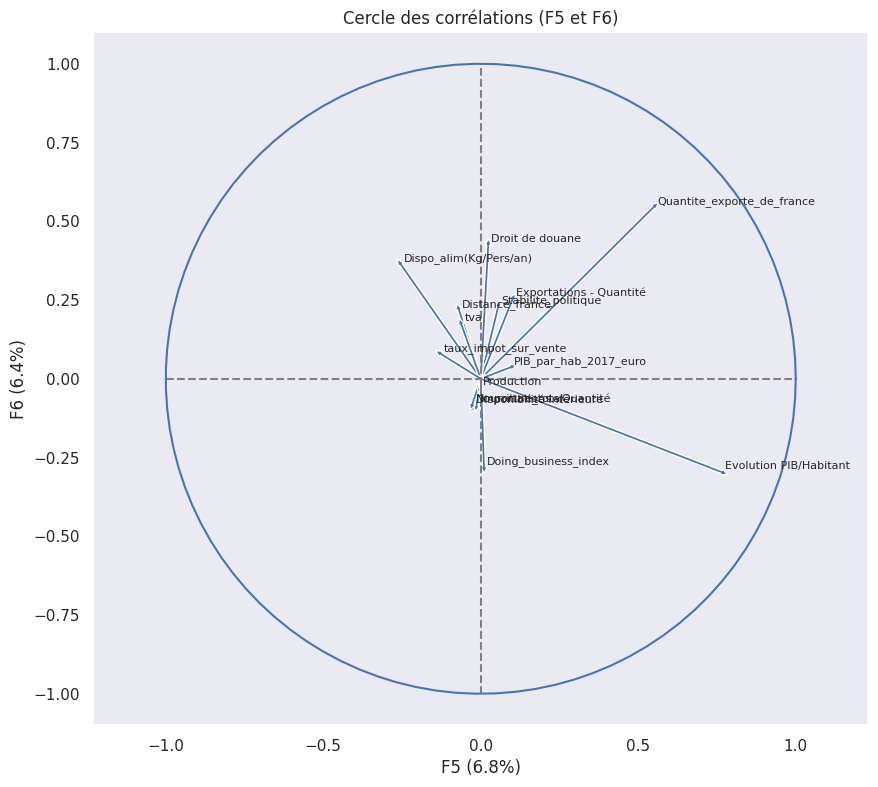

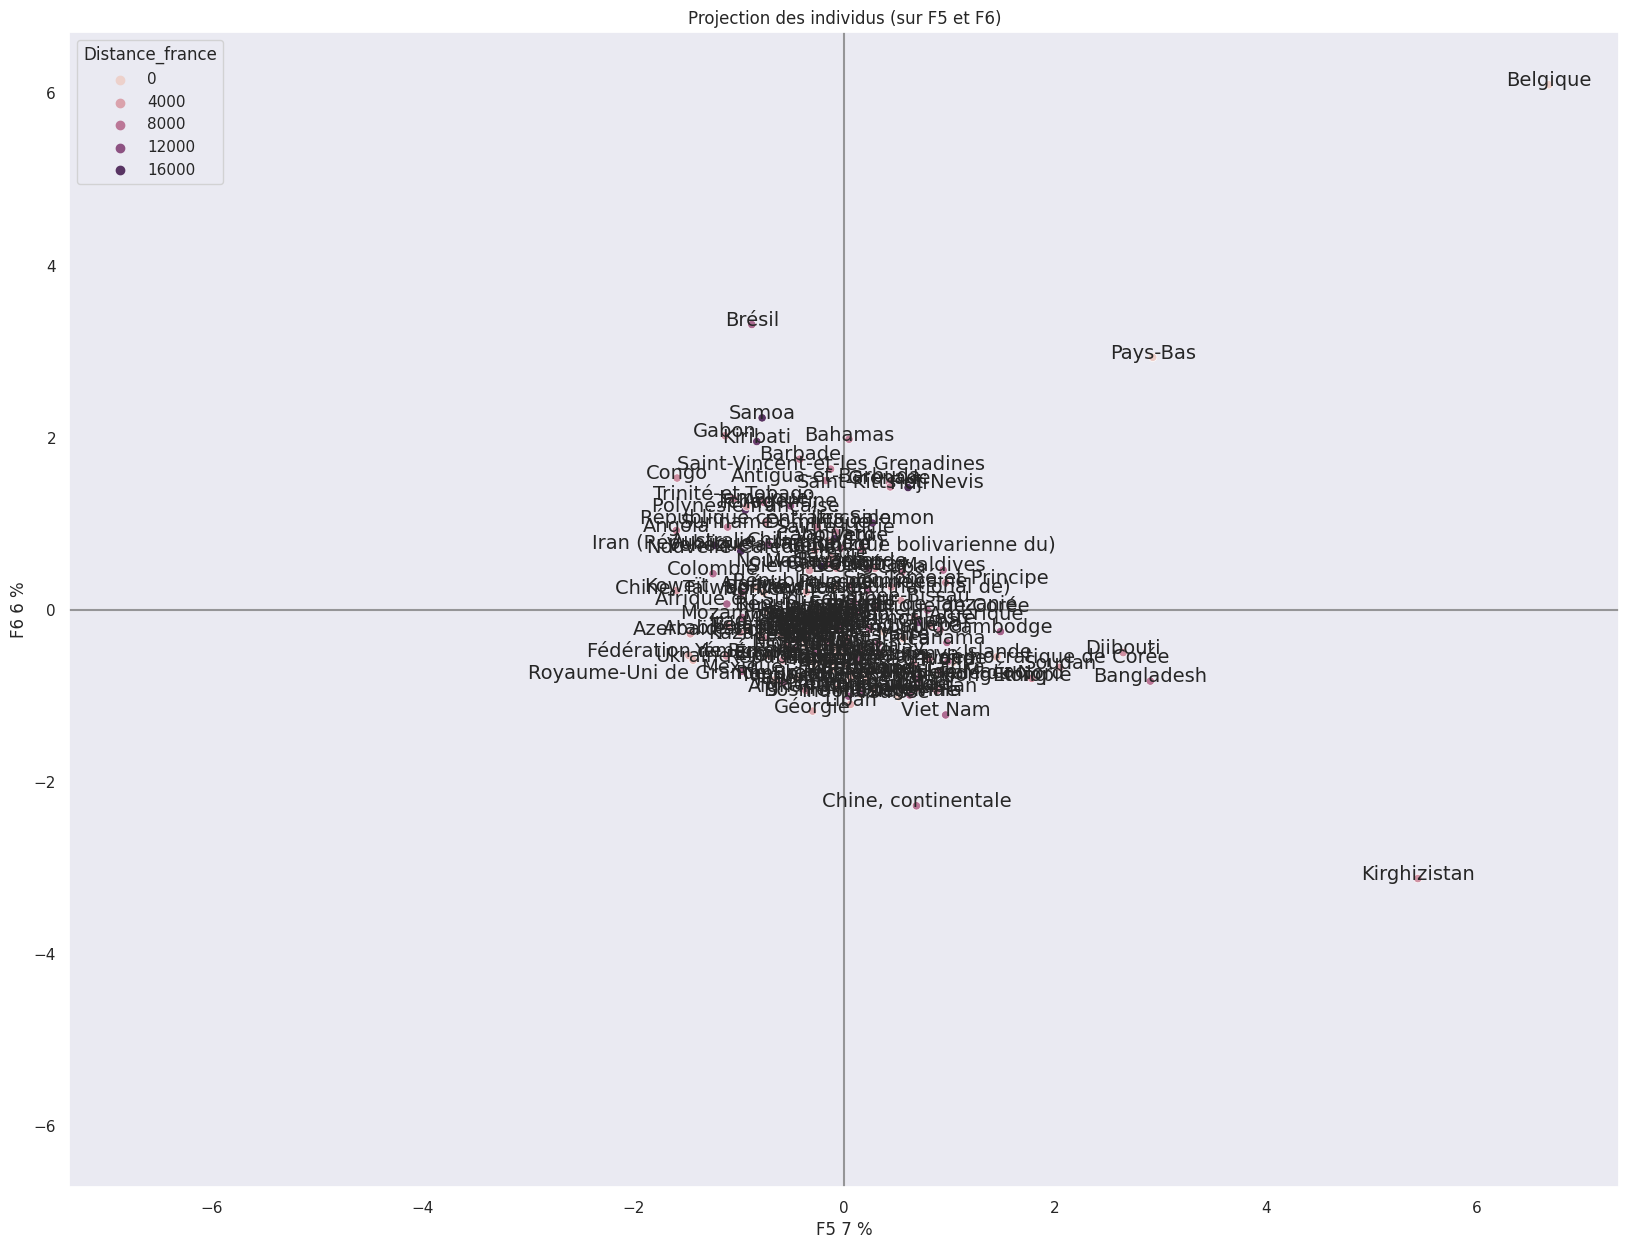

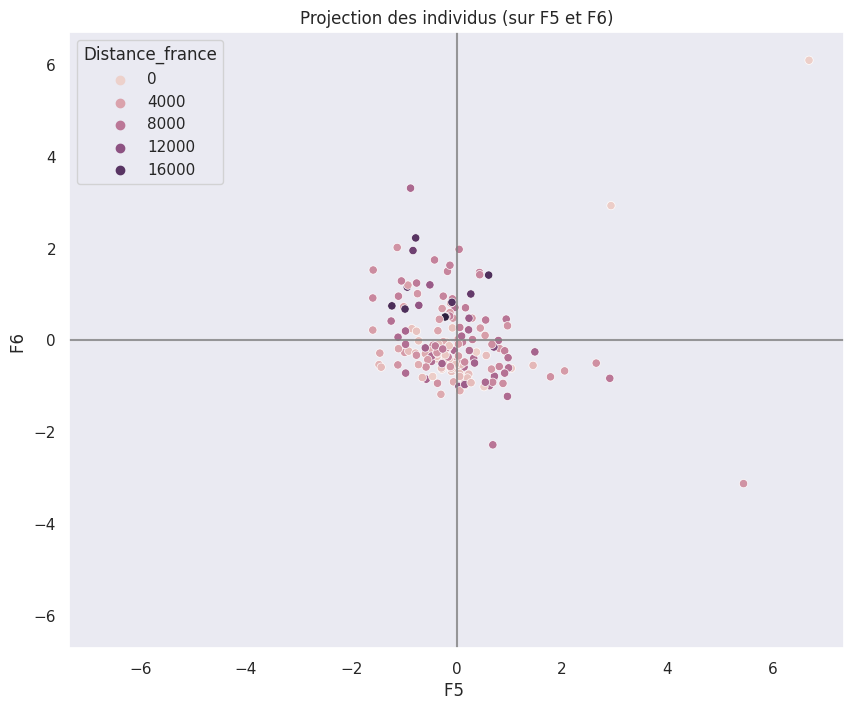

In [143]:
 # EXaminons les projections sur F5 et F6
x_y = (4,5)
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


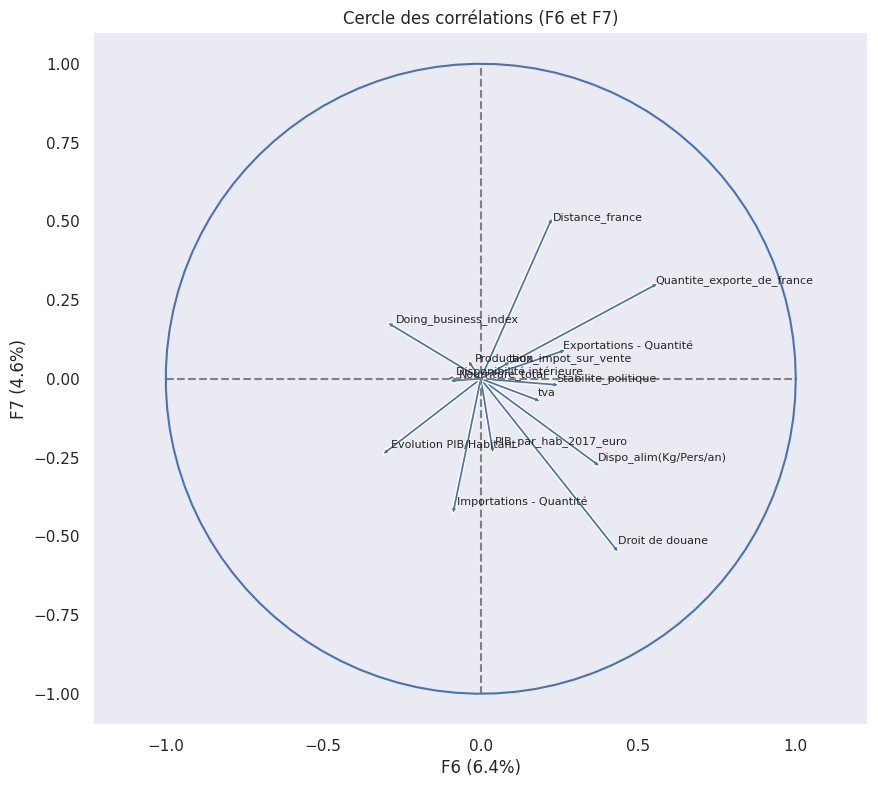

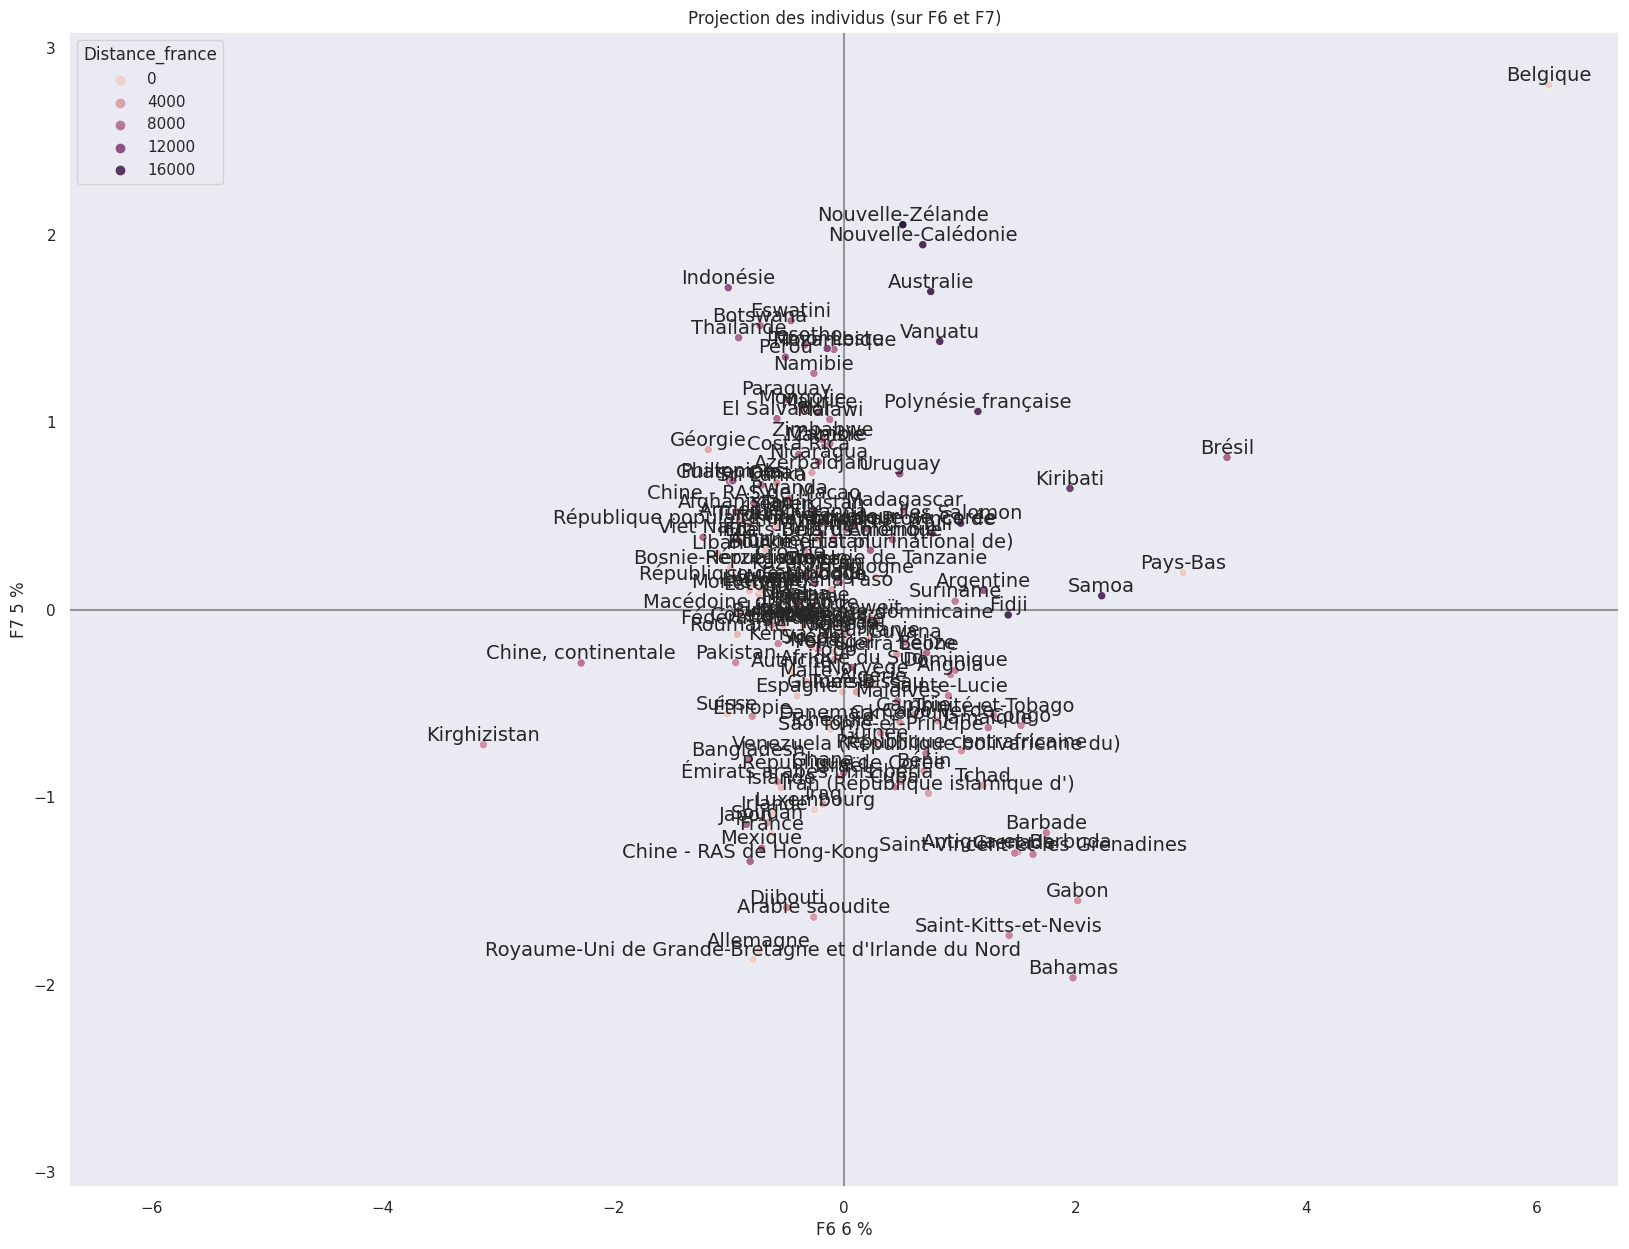

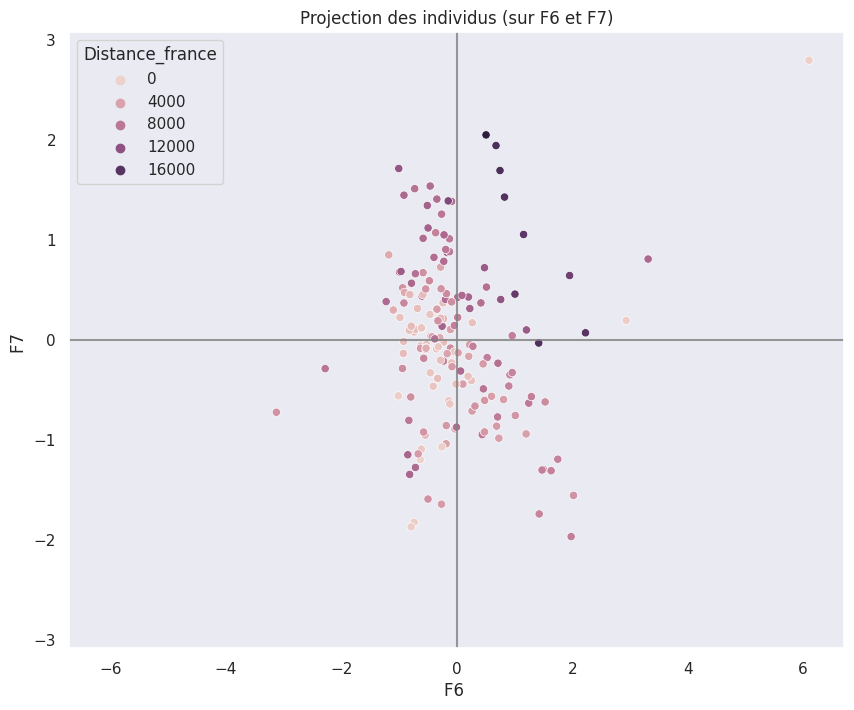

In [144]:
#on eximine pour finir les projections sur F6 et F7
x_y = (5,6)
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])

# Identification des axes principaux d'inertie:
* F1 représente la capacité des pays à produire et à exporter des poulets
* F2 représente la facilité de faire du business avec lla France
* F3 représente le protectionnisme des pays
* F4 représente la part de la france dans les importations d''un pays
* F5 représente le niveau de croissance d'un pays
* F6 représente le niveau de relation commerdciale avec la france
* F7 représente la relation entre l'éloignement du pays avec la france et ses importations


**Qu’est ce que l’on veut pour exporter nos Poulet en se basant sur ce que représentent les axes principaux d’inertie ?**
-	Des pays qui ont une production de poulet faible ou peu élevé c'est à dire F1>0
-	Des pays ou il est relativement facile de faire du business même s'ils produisent des poulets c'est à dire F2<1
-	Des pays qui ne font pas ou peu de protectionnisme c'es à dire F3>-1
-	Des pays qui importe des poulets de france c'est à dire F4>0
- Des pays qui ont une croissance économique stable ou élevé c'est à dire F5>0
-	Des pays qui ont une relation commerciale mmoyenne ou bonne c'est à dire F6>0
- Des pays qui importes de france et qui sont relativement proche de la france c'est à dire F7>-1


In [145]:
# affichage des composantes principales par pays
df_compo = pd.DataFrame(X_proj, index=df.index, columns=["F" + str(i+1) for i in range(14)]).iloc[:, :7]
df_compo_tot = pd.DataFrame(X_proj, index=df.index, columns=["F" + str(i+1) for i in range(14)]).iloc[:, :14]
df_compo.head()

F1        F2        F3        F4        F5        F6  \
Zone                                                                         
Afghanistan    -1.684645  3.118661  0.393578  2.611101 -0.365360 -0.937109   
Afrique du Sud  1.356491  0.245971  0.752702  1.277400 -1.114366  0.066469   
Albanie        -0.416865 -1.389510 -1.037761 -0.248676 -0.099039 -0.679882   
Algérie        -1.246691  0.576964 -1.938070  0.693048 -0.853812  0.252762   
Allemagne       2.694422 -2.458671 -0.286636  2.135935  0.165997 -0.737478   

                      F7  
Zone                      
Afghanistan     0.524388  
Afrique du Sud -0.307680  
Albanie         0.318374  
Algérie        -0.403177  
Allemagne      -1.820733

In [146]:
# Obtention des noms des pays satisfaisants les conditions désirées
# comme aucun pays ne sastisfont à toutes les conditions en même temps(idem pour 6 et 5 conditions), on prend les pays qui safistisfont aux 4 premières composantes principales
noms_pays = df_compo_tot.query('F1>0 & F2<1 & F3>-1 & F4>0').index.tolist()  #& F5>-1 & F6>0 &-F7>-1

# Affichage des noms des pays
print(noms_pays)
print(len(noms_pays))

['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Canada', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Espagne', 'France', 'Japon', 'Koweït', 'Mexique', 'Oman', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Suisse', 'Viet Nam', 'Émirats arabes unis']
17


L'analyse ACP permet de déterminer que 15 pays sont intéressants pour l'exportation de nos poulets:


Avant d'en tirer des conclusions définitives regardont ce que préconisent les méthode de clustering

# Kmeans

## Kmeans sur le fichier de base table_fus

In [147]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)

on test d'abord avec 7 clusters et on va travailler sur une copy appelé X de df

In [148]:
X = df.copy()

In [149]:
#on entraine le model
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [150]:
#on peut calculer son inertie (somme des carrés des distances entre chaque point)
kmeans.inertia_

2.807336948830221e+19

l'inertie étant très élevés, il semble que les points de chaque cluster sont dispersés sur de grande distances par rapport à leur centree

Evaluation du nombre de cluster par la méthode du coude

In [151]:
#on creer une liste vide pour enregistrer les inerties
inertia = []

In [152]:
# k_list : notre liste du nombre de cluster
k_list = range(1, 11)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [153]:
#pour chaque nombre de cluster, on instancie un k_means pour k clusters puis on entraine le model et on enregistre l'inertie obtenue dans inertia
for i in k_list :
  kmeans = KMeans(n_clusters=i, n_init=10)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
  centroids  = kmeans.cluster_centers_

In [154]:
inertia

[2.666148715272599e+21,
 4.0696223236693996e+20,
 2.0801089324596206e+20,
 9.603205424560574e+19,
 5.101236990422e+19,
 3.916480490306393e+19,
 2.807336948830221e+19,
 2.2787627221150056e+19,
 2.018247671898126e+19,
 1.741786457565071e+19]

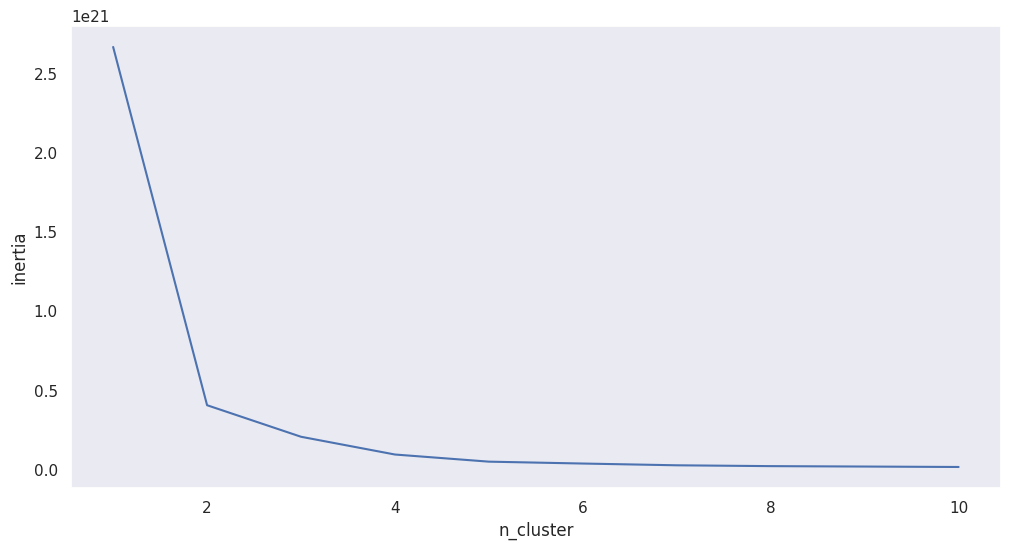

In [155]:
# affichage du graphique des inerties pour constater la cassure de la courbe
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)

La méthode du coude semble indiquer qu'il faut prendre 2 clusters. Vérifions cette indication par une autre méthode

In [156]:
#utilisation de la librairie kneed pour calculer le nombre de cluster
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
print(f'Nombre de cluster : {kl.elbow}')


Nombre de cluster : 2


L'utilisation de la librairie kneed qui permet d'identifier le point de coude d'une ligne ajustée aux données indique un nombre de cluster de 2

Evaluation du nombre de cluster par la méthode de la silhouette

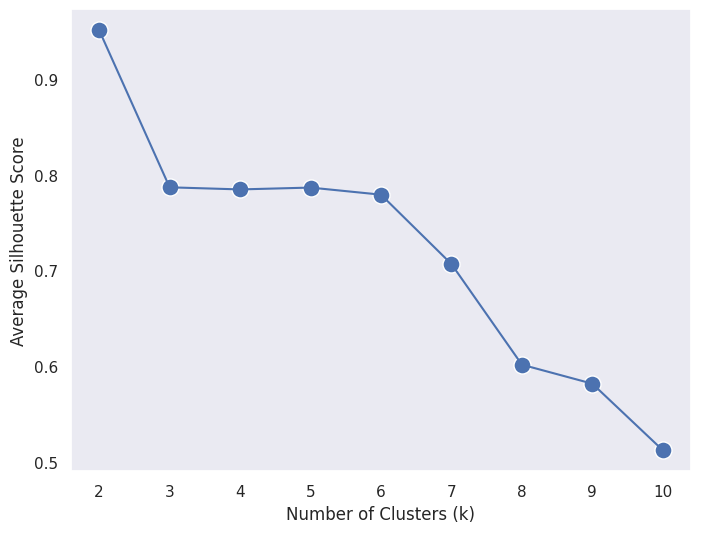

In [157]:
#The Average Silhouette Score
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))

silhouette_series = pd.Series(silhouette, index=range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Average Silhouette Score')

plt.show()

In [158]:
silhouette_series

2     0.950846
3     0.787021
4     0.784818
5     0.786745
6     0.779346
7     0.706960
8     0.602011
9     0.582178
10    0.512761
dtype: float64

La méthode de la silhouette confirme qu'il faut prendre 2 clusters car pour k=2, on a le score silhouette le plus élevé.

Les 3 méthodes s'accordent à dire qu'il faut prendre 2 clusters mais après un essai avec K=2, on obtient un cluster de 3 pays et un auttre de 169. Ce qui est difficile d'en tirer des conclusions. Nous allons prendre k=5 (un essai a été fait aussi avec 3)


In [159]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
inertia.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [160]:
kmeans.labels_

array([2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2], dtype=int32)

In [161]:
centroids

array([[ 1.43792692e+05, -2.88846154e-01,  1.71272392e+04,
        -2.63138878e+00,  2.49238462e+01,  1.56073077e+09,
         1.93269231e+08,  2.35615385e+08,  1.45019231e+09,
         1.57692308e+09,  6.46440165e+03,  4.42423077e+00,
         1.50384615e+01,  1.51153846e+01,  7.16650000e+01],
       [ 0.00000000e+00,  5.50000000e-02,  3.23006550e+04,
         2.78135006e+01,  3.40050000e+01,  1.82135000e+10,
         2.13400000e+09,  2.87500000e+08,  1.78090000e+10,
         2.00750000e+10,  7.03169450e+03,  4.58000000e+00,
         1.17500000e+01,  6.50000000e+00,  8.08000000e+01],
       [ 7.39340145e+05, -5.00000000e-03,  1.25627872e+04,
         7.47775781e+00,  1.90873188e+01,  1.26572464e+08,
         6.39672571e+07,  5.30289855e+07,  1.22181159e+08,
         1.20966529e+08,  5.91677592e+03,  6.26471014e+00,
         1.59409420e+01,  1.58547101e+01,  6.27772464e+01],
       [ 0.00000000e+00, -4.20000000e-01,  9.30291000e+03,
        -1.97184748e+01,  4.80300000e+01,  9.98200000

In [162]:
#on ajoute le numéro du cluster auquel appartient chaque pays à X
X["cluster"] = kmeans.labels_
X

Quantite_exporte_de_france  Stabilite_politique  \
Zone                                                                     
Afghanistan                                   0.0                -2.80   
Afrique du Sud                                0.0                -0.28   
Albanie                                     440.0                 0.38   
Algérie                                   51470.0                -0.92   
Allemagne                               1313490.0                 0.59   
...                                           ...                  ...   
Émirats arabes unis                           0.0                 0.62   
Équateur                                      0.0                -0.07   
États-Unis d'Amérique                         0.0                 0.34   
Éthiopie                                      0.0                -1.68   
Îles Salomon                                  0.0                 0.20   

                       PIB_par_hab_2017_euro  Evolution PIB/Habitant  \
Zone                                                                   
Afghanistan                           498.34              -20.054736   
Afrique du Sud                       6330.41              -17.609702   
Albanie                              4259.17                6.671974   
Algérie                              3886.84              -26.303107   
Allemagne                           41973.43                1.816712   
...                                      ...                     ...   
Émirats arabes unis                 40480.13               -2.980208   
Équateur                             5871.62               10.001813   
États-Unis d'Amérique               56313.29               15.686834   
Éthiopie                              710.41               64.813243   
Îles Salomon                         2146.56                9.385790   

                       Dispo_alim(Kg/Pers/an)  Disponibilité intérieure  \
Zone                                                                      
Afghanistan                              1.53              5.700000e+07   
Afrique du Sud                          35.69              2.118000e+09   
Albanie                                 16.36              4.700000e+07   
Algérie                                  6.38              2.770000e+08   
Allemagne                               19.47              1.739000e+09   
...                                       ...                       ...   
Émirats arabes unis                     43.47              4.120000e+08   
Équateur                                19.31              3.410000e+08   
États-Unis d'Amérique                   55.68              1.826600e+10   
Éthiopie                                 0.13              1.400000e+07   
Îles Salomon                             4.45              3.000000e+06   

                       Exportations - Quantité  Importations - Quantité  \
Zone                                                                      
Afghanistan                       1.321852e+08               29000000.0   
Afrique du Sud                    6.300000e+07              514000000.0   
Albanie                           0.000000e+00               38000000.0   
Algérie                           0.000000e+00                2000000.0   
Allemagne                         6.460000e+08              842000000.0   
...                                        ...                      ...   
Émirats arabes unis               9.400000e+07              433000000.0   
Équateur                          0.000000e+00                      0.0   
États-Unis d'Amérique             3.692000e+09              123000000.0   
Éthiopie                          1.321852e+08                1000000.0   
Îles Salomon                      0.000000e+00                6000000.0   

                       Nourriture_total    Production  Distance_france  \
Zone                                                                     
Afghanistan            

In [163]:
#création d'une fonction d'affichage des clusters car on va faire plusieurs fois l'opération
def Affichage_cluster(tab):
    for i in range(5):
        cluster = tab[tab['cluster'] == i].index
        print(f"Cluster '{i}' data:")
        print(cluster)
        nb = (tab['cluster'] == i).sum()
        print(f"Nombre d'éléments dans le cluster '{i}': {nb}\n")
        print('______________________________________________________________')


In [164]:
Affichage_cluster(X)

Cluster '0' data:
Index(['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Argentine',
       'Australie', 'Canada', 'Colombie', 'Espagne', 'France', 'Indonésie',
       'Iran (République islamique d')', 'Italie', 'Japon', 'Malaisie',
       'Myanmar', 'Pakistan', 'Philippines', 'Pologne', 'Pérou',
       'Royaume-Uni de Grande-Bretagne et d'Irlande du Nord',
       'République de Corée', 'Thaïlande', 'Turquie', 'Ukraine', 'Viet Nam',
       'Égypte'],
      dtype='object', name='Zone')
Nombre d'éléments dans le cluster '0': 26

______________________________________________________________
Cluster '1' data:
Index(['Chine, continentale', 'États-Unis d'Amérique'], dtype='object', name='Zone')
Nombre d'éléments dans le cluster '1': 2

______________________________________________________________
Cluster '2' data:
Index(['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda',
       'Arménie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bangladesh',
       ...
       'Uruguay', 

In [165]:
# création d'une fonction permettant de représenter en boxplot chaque cluster pour chaque variables
# cette méthode a été choisie car elle permet de déterminer visuellement le smeilleures clusters
def Affichage_boxplot(tab,d,f) :
  plt.figure(figsize=(20, 15))
  sns.set(style="dark")

  for i in range(d,f):
      plt.subplot(6, 3, i+1)
      sns.boxplot(data=tab, x='cluster', y=tab[tab.columns[i]])

  plt.show()


Détermination des centroides

In [166]:
X.groupby('cluster').mean().applymap(lambda x: '{:.2f}'.format(x))


Quantite_exporte_de_france Stabilite_politique PIB_par_hab_2017_euro  \
cluster                                                                        
0                        143792.69               -0.29              17127.24   
1                             0.00                0.06              32300.65   
2                        739340.14               -0.00              12562.79   
3                             0.00               -0.42               9302.91   
4                          1043.33               -0.71               6928.64   

        Evolution PIB/Habitant Dispo_alim(Kg/Pers/an)  \
cluster                                                 
0                        -2.63                  24.92   
1                        27.81                  34.01   
2                         7.48                  19.09   
3                       -19.72                  48.03   
4                        -1.01                  21.91   

        Disponibilité intérieure Exportations - Quantité  \
cluster                                                    
0                  1560730769.23            193269230.77   
1                 18213500000.00           2134000000.00   
2                   126572463.77             63967257.11   
3                  9982000000.00           4223000000.00   
4                  4145333333.33             42666666.67   

        Importations - Quantité Nourriture_total      Production  \
cluster                                                            
0                  235615384.62    1450192307.69   1576923076.92   
1                  287500000.00   17809000000.00  20075000000.00   
2                   53028985.51     122181159.42    120966528.64   
3                    3000000.00    9982000000.00  14201000000.00   
4                  399333333.33    3844000000.00   3746000000.00   

        Distance_france Droit de douane    tva taux_impot_sur_vente  \
cluster                                                               
0               6464.40            4.42  15.04                15.12   
1               7031.69            4.58  11.75                 6.50   
2               5916.78            6.26  15.94                15.85   
3               9408.41            8.01  35.00                17.00   
4               6098.45            4.77  21.33                18.00   

        Doing_business_index  
cluster                       
0                      71.66  
1                      80.80  
2                      62.78  
3                      59.10  
4                      73.87

Le cluster 0 regroupe les pays stables politiquement qui

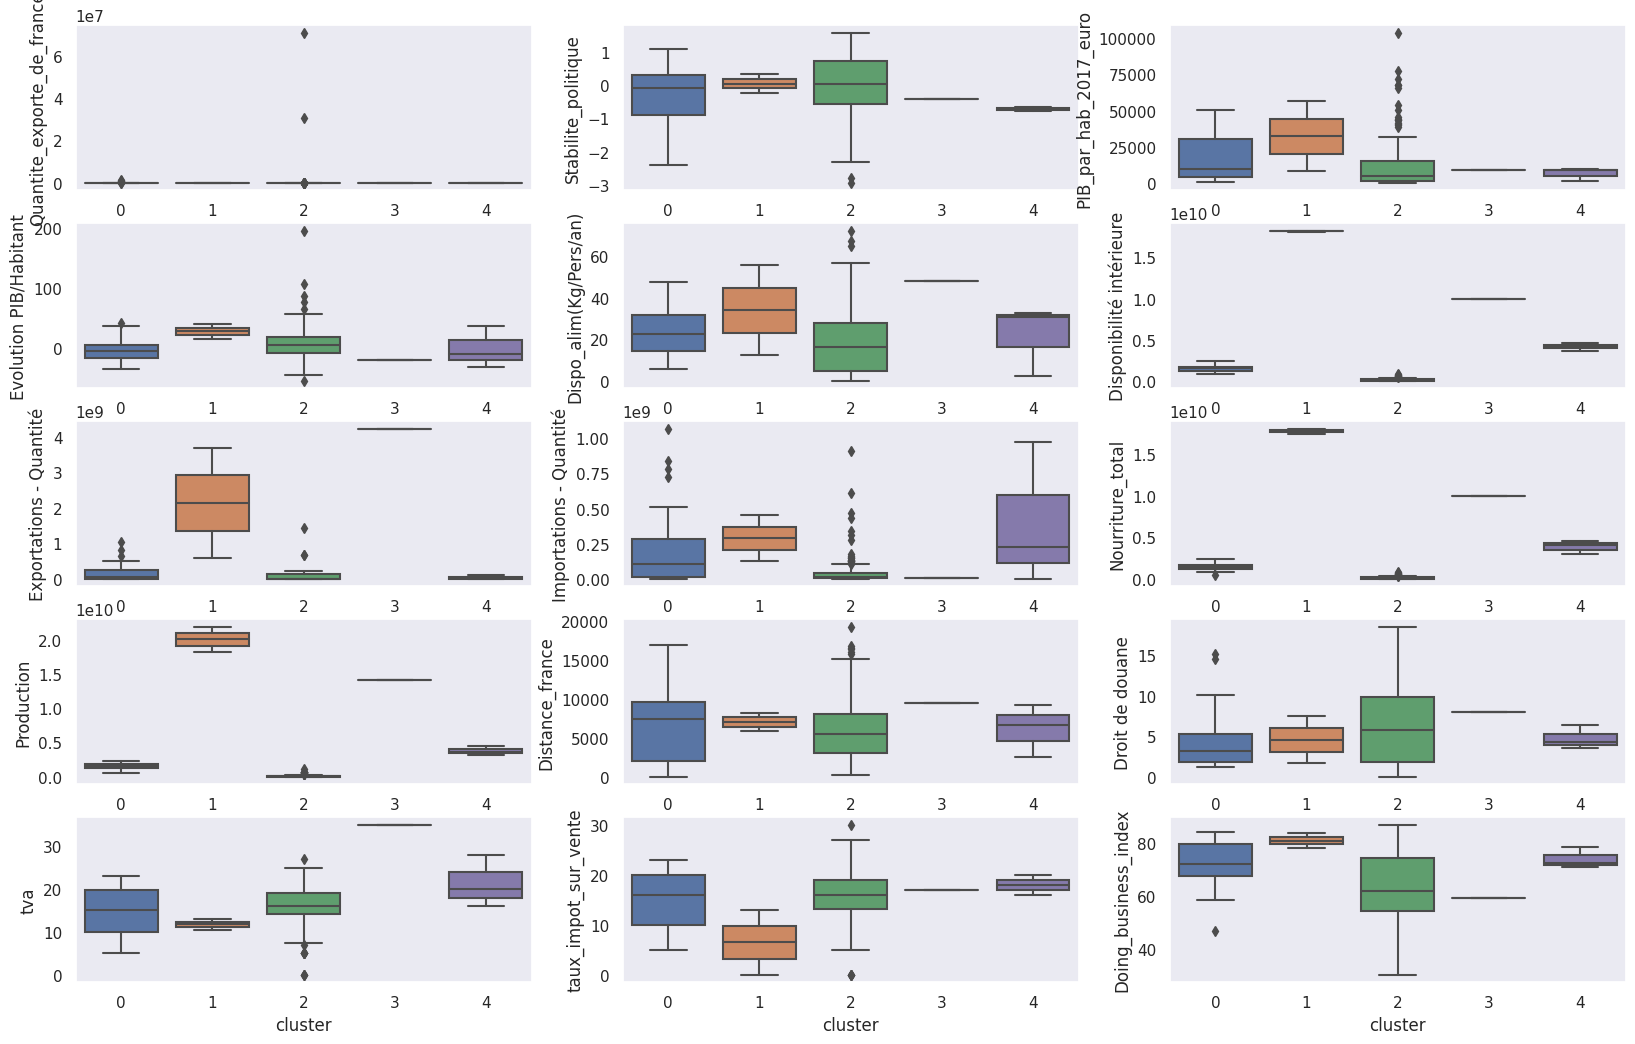

In [167]:
#représentation des clusters
Affichage_boxplot(X,0,15)

l'analyse de ces données a été effectuée en donnant un poids pour chaque variables et en classant les chaque cluster dans chacune des variables. La somme des scores de chaque cluster détermine qu'elles sont les meilleures pays
La même méthode a été appliqué pour 3 et 5 clusters

Pour 5 clusters les meilleures pays sont : Chine, Etats unis, Afrique du sud, Allemagne, Arabie saoudite, Argentine, Australie, Canada, Colombie, Espagne, France, indonésie, Iran, Italie, japon, Malaisie, Myanmar, Pakistan, Philippines, Pologne, Pérou, Grande Bretagne, Corée du Sud, Thailande, Turquie, Ukraine, Viet-Nam, Egypte soit 28 pays

Pour 3 clusters les meilleures pays sont : Russie, Inde, Mexique,Afrique du sud, Allemagne, Arabie Saoudite,Argentine, Austrralie,Canada, Colombie, Espagne, Indonésie, Iran, Italie, Japon, Malaisie, Myanmar, Pakistan, Philippine, Pologne, Pérou, Grande Bretagne, Corée du sud, Thailande, Turquie, Ukraine, Viet Nam, Egypte, France soit 29 pays

On voit qu'il y a déjà des pays qui sont citée plusieurs fois mais continuons

Remarque : la France est citée dans la liste de chacun des clusters retenue ce qui est rassurant

In [168]:
#sns.pairplot(X, hue='cluster', palette='viridis')

## Kmeans sur les données résultantes de l'ACP

Comme il y a moins de variables dans la résultante de la pca par rapport au fichier de base, il est intéressant de voir les clusters et voir si l'on retrouve le même pays

In [169]:
Xpca=df_compo_tot


In [170]:
# le même nombre de cluster que pour le kmeans sur table_fus est pris pour pouvoir faire plus facilement des comparaisons
kmeans = KMeans(n_clusters=5)
kmeans.fit(Xpca)
inertia.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [171]:
Xpca["cluster"] = kmeans.labels_

In [172]:
#Xpca.rename(columns={'F1' : 'Production' , 'F2' : 'Facilité_Business', 'F3': 'Prospérité/protectionnisme', 'F4' : 'Concurence', 'F5': 'Croissance_eco', 'F6':'Protection_éco', 'F7' : 'Coût_export'}, inplace=True)

In [173]:
Xpca.head()

F1        F2        F3        F4        F5        F6  \
Zone                                                                         
Afghanistan    -1.684645  3.118661  0.393578  2.611101 -0.365360 -0.937109   
Afrique du Sud  1.356491  0.245971  0.752702  1.277400 -1.114366  0.066469   
Albanie        -0.416865 -1.389510 -1.037761 -0.248676 -0.099039 -0.679882   
Algérie        -1.246691  0.576964 -1.938070  0.693048 -0.853812  0.252762   
Allemagne       2.694422 -2.458671 -0.286636  2.135935  0.165997 -0.737478   

                      F7        F8        F9       F10       F11       F12  \
Zone                                                                         
Afghanistan     0.524388 -1.495480  0.486222 -0.394188  0.933366 -0.181297   
Afrique du Sud -0.307680  1.823584  0.427344 -0.001435  0.058666  0.087786   
Albanie         0.318374 -0.082246  0.385318 -0.042389 -0.650713  0.754798   
Algérie        -0.403177 -0.734436 -0.268186  0.023572  0.045348  0.369631   
Allemagne      -1.820733  1.445214 -0.523404 -1.261189 -0.553065 -0.444479   

                     F13       F14  cluster  
Zone                                         
Afghanistan    -1.023459  0.002417        4  
Afrique du Sud  0.170412 -0.020711        0  
Albanie         0.006146 -0.002705        1  
Algérie         0.128011  0.016297        4  
Allemagne      -0.190567 -0.003114        3

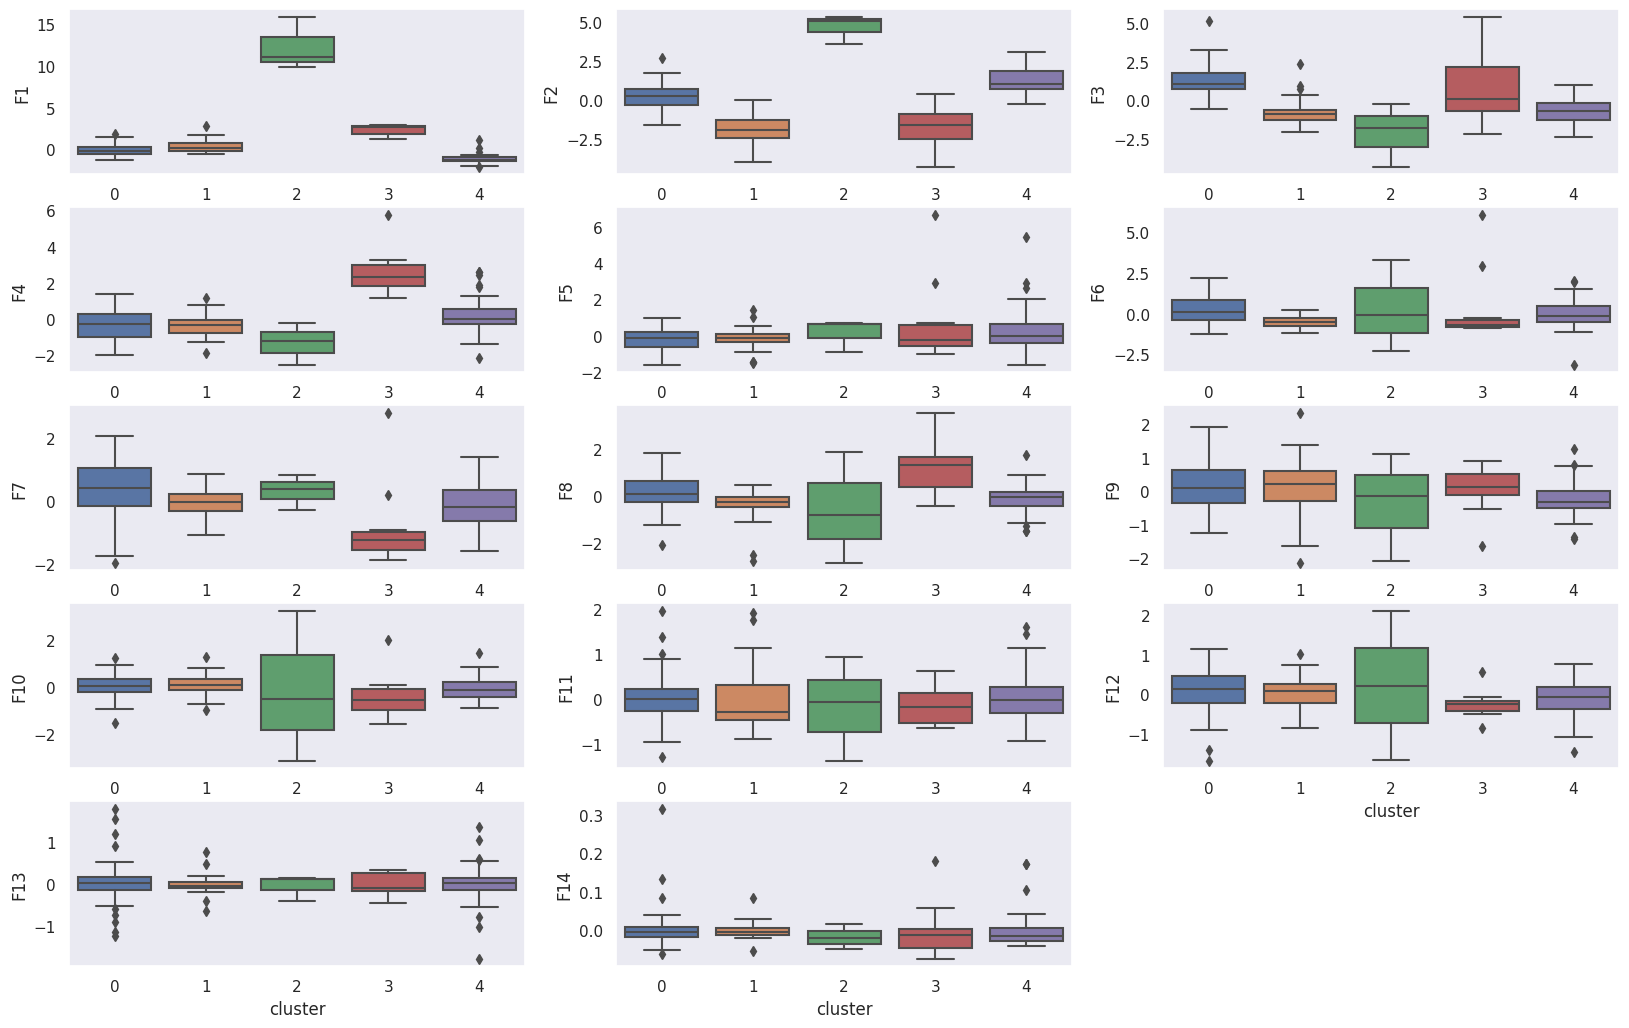

In [174]:
Affichage_boxplot(Xpca,0,14)

In [175]:
# détermination des centroids
Xpca.groupby('cluster').mean().applymap(lambda x: '{:.2f}'.format(x))

F1     F2     F3     F4     F5     F6     F7     F8     F9    F10  \
cluster                                                                         
0        -0.09   0.21   1.26  -0.33  -0.16   0.26   0.35   0.14   0.13   0.06   
1         0.31  -1.91  -0.83  -0.35  -0.17  -0.48  -0.07  -0.34   0.13   0.11   
2        12.33   4.69  -2.12  -1.31   0.16   0.32   0.30  -0.58  -0.36  -0.14   
3         2.31  -1.82   0.79   2.61   0.71   0.37  -0.82   1.23   0.07  -0.39   
4        -1.16   1.21  -0.70   0.19   0.15   0.00  -0.17  -0.08  -0.21  -0.06   

           F11    F12    F13    F14  
cluster                              
0         0.00   0.08   0.02   0.00  
1        -0.01   0.06  -0.02  -0.00  
2        -0.17   0.23  -0.05  -0.02  
3        -0.17  -0.24  -0.03   0.00  
4         0.04  -0.09   0.00  -0.00

In [176]:
Affichage_cluster(Xpca)

Cluster '0' data:
Index(['Afrique du Sud', 'Antigua-et-Barbuda', 'Argentine', 'Australie',
       'Bahamas', 'Barbade', 'Belize', 'Bolivie (État plurinational de)',
       'Botswana', 'Canada', 'Chili', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Colombie', 'Costa Rica', 'Cuba',
       'Dominique', 'El Salvador', 'Eswatini', 'Fidji', 'Grenade', 'Guatemala',
       'Guyana', 'Indonésie', 'Jamaïque', 'Jordanie', 'Kazakhstan', 'Koweït',
       'Lesotho', 'Malaisie', 'Maurice', 'Mongolie', 'Myanmar', 'Namibie',
       'Nicaragua', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Oman', 'Panama',
       'Paraguay', 'Philippines', 'Polynésie française', 'Pérou',
       'République de Corée', 'République dominicaine', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Sri Lanka',
       'Suriname', 'Thaïlande', 'Timor-Leste', 'Trinité-et-Tobago', 'Uruguay',
       'Vanuatu', 'Viet Nam', 'Équateur'],
      dtype='object', name='Zone')
Nombre 

La même méthode que pour le kmeans sur les données de base a été utilisée et on trouve :

Albanie, Allemagne, Arménie, Autriche, Azebaidjan, Bosnie, Bulgarie, Bélarus, Chypre, Croatie, Danemark, Espagne, Estonie, Finlande,France, Russie, Gréce, Géorgie, Hongrie, Iralnde, islande, Israel, Italie, Lettonie, Littuanie, Luxembourg, Macédoine duu nord, Malte, Maroc, Monténégro, Norvège, Pays bas, Poplogne, portugal, Roumanie, Grnade Bretagne, Moldavie, Serbie, Slovaquie, Slovénie, Suisse, Suède, Tchéquie, Turquie, Ukraine soit 45 pays

In [177]:
#sns.pairplot(Xpca, hue='cluster', palette='viridis')

<Axes: xlabel='F2', ylabel='F3'>

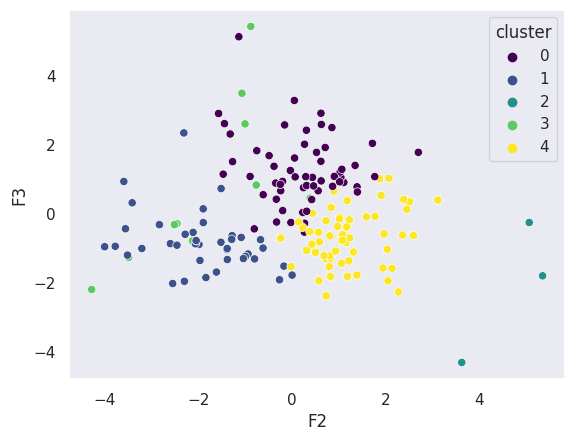

In [178]:
sns.scatterplot(data=Xpca, x='F2', y='F3', hue='cluster', palette='viridis')

On voit qu'il y a beaucoup de chevauchement

# Classification Ascendante Hierarchique (CAH) selon la methode de ward

## CAH sur le fichier de base table_fus

In [179]:
X = df
Z = linkage(X, method="ward")

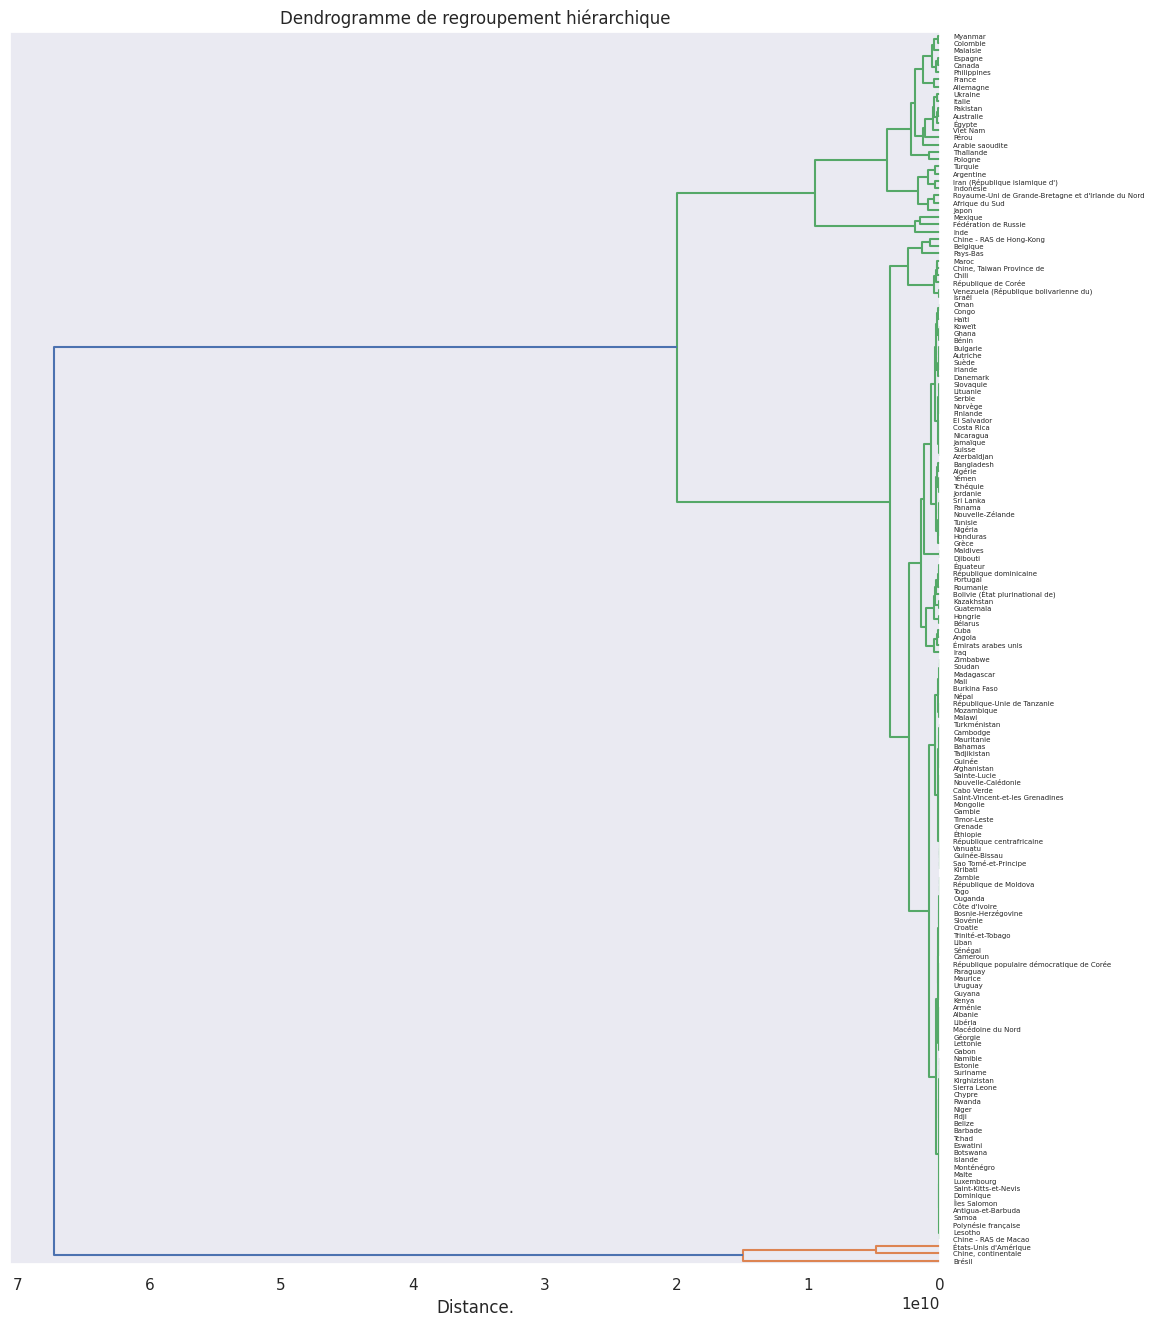

In [180]:
#affichage des données sous forme d'un dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left')

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Distance.")
#plt.ylabel("Distance.")
plt.show()

on rend le dendrogramme plus lisible en se limitant à 5 groupes
Remarque : la même chose a été faite avec 3 groupe dans l'idée de pouvoir faire des comparaison avec ce qui a té fait pour le Kmeans

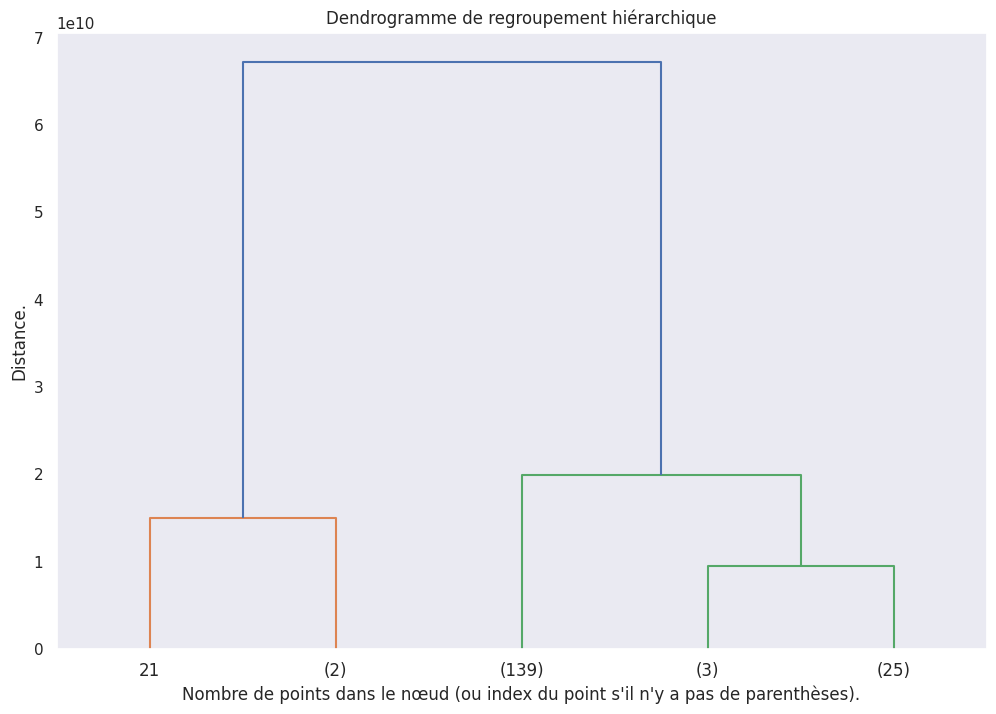

In [181]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp")

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()

Les résultats obtenues sont très cohérents avec ceux du Kmean pour les données de table_fus, on retrouve le même nombre d'élément par cluster

In [182]:
#Identification des 5 groupes obtenus
groupes_cah = fcluster(Z, 3, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

#Index trié des groupes
idg = np.argsort(groupes_cah)

#Affichage des pays selon leurs groupes
df_groupes_cah = pd.DataFrame(X.index[idg], groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'cluster'})

Numérotation de nos groupes : [1 2 3]


In [183]:
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah = pd.merge(X, df_groupes_cah, on='Zone')

In [184]:
df_groupe1_cah = df_groupes_cah[df_groupes_cah['cluster'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['cluster'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['cluster'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['cluster'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['cluster'] == 5]

In [185]:
# affichage des centroids
df_groupes_cah.groupby('cluster').mean().applymap(lambda x: '{:.2f}'.format(x))

<ipython-input-185-235ee4826d22>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupes_cah.groupby('cluster').mean().applymap(lambda x: '{:.2f}'.format(x))


Quantite_exporte_de_france Stabilite_politique PIB_par_hab_2017_euro  \
cluster                                                                        
1                             0.00               -0.10              24634.74   
2                        734021.15               -0.00              12686.22   
3                        133633.57               -0.36              15584.80   

        Evolution PIB/Habitant Dispo_alim(Kg/Pers/an)  \
cluster                                                 
1                        11.97                  38.68   
2                         7.60                  19.07   
3                        -3.41                  24.89   

        Disponibilité intérieure Exportations - Quantité  \
cluster                                                    
1                 15469666666.67           2830333333.33   
2                   131805755.40             63550226.49   
3                  1862892857.14            183821428.57   

        Importations - Quantité Nourriture_total      Production  \
cluster                                                            
1                  192666666.67   15200000000.00  18117000000.00   
2                   53633093.53     127446043.17    126125042.82   
3                  256678571.43    1727964285.71   1835714285.71   

        Distance_france Droit de douane    tva taux_impot_sur_vente  \
cluster                                                               
1               7823.93            5.72  19.50                10.00   
2               5938.82            6.32  15.90                15.81   
3               6335.30            4.10  15.89                15.61   

        Doing_business_index  
cluster                       
1                      73.57  
2                      62.93  
3                      71.46

In [186]:
df_groupes_cah.head()

Zone  Quantite_exporte_de_france  Stabilite_politique  \
0     Afghanistan                         0.0                -2.80   
1  Afrique du Sud                         0.0                -0.28   
2         Albanie                       440.0                 0.38   
3         Algérie                     51470.0                -0.92   
4       Allemagne                   1313490.0                 0.59   

   PIB_par_hab_2017_euro  Evolution PIB/Habitant  Dispo_alim(Kg/Pers/an)  \
0                 498.34              -20.054736                    1.53   
1                6330.41              -17.609702                   35.69   
2                4259.17                6.671974                   16.36   
3                3886.84              -26.303107                    6.38   
4               41973.43                1.816712                   19.47   

   Disponibilité intérieure  Exportations - Quantité  Importations - Quantité  \
0              5.700000e+07             1.321852e+08               29000000.0   
1              2.118000e+09             6.300000e+07              514000000.0   
2              4.700000e+07             0.000000e+00               38000000.0   
3              2.770000e+08             0.000000e+00                2000000.0   
4              1.739000e+09             6.460000e+08              842000000.0   

   Nourriture_total    Production  Distance_france  Droit de douane   tva  \
0      5.500000e+07  2.800000e+07        5590.3810             7.02   0.0   
1      2.035000e+09  1.667000e+09        9353.5520             4.51  15.0   
2      4.700000e+07  1.300000e+07        1603.5340             0.85  20.0   
3      2.640000e+08  2.750000e+08        1340.3900             8.85  19.0   
4      1.609000e+09  1.514000e+09         439.8984             1.79  19.0   

   taux_impot_sur_vente  Doing_business_index  cluster  
0                  10.0                 44.06        2  
1                  15.0                 67.02        3  
2                  20.0                 67.75        2  
3                  19.0                 48.60        2  
4                  19.0                 79.71        3

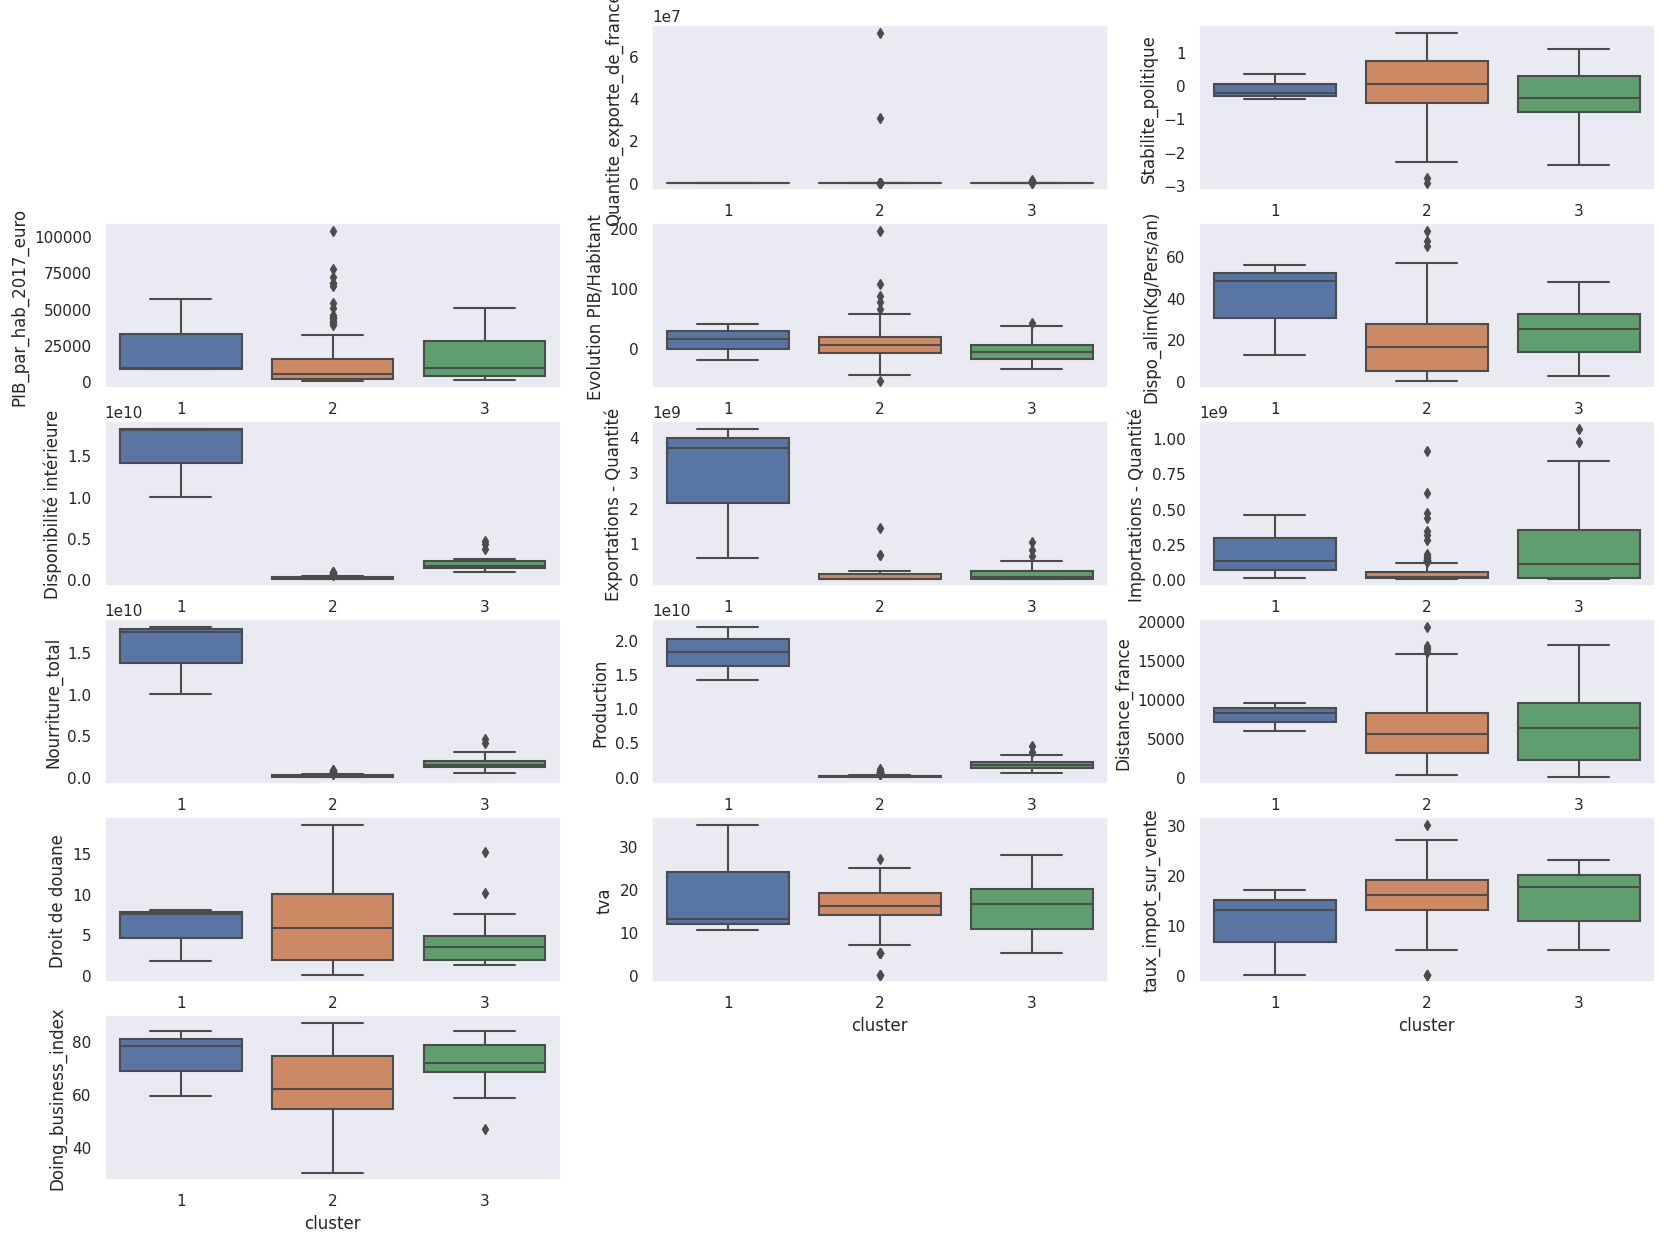

In [187]:
Affichage_boxplot(df_groupes_cah,1,16)

In [188]:
# création d'une fonction permettant d'afficher les groupes de pays
def Affichage_groupe(tab):
    for i in range(1,6):
        cluster = tab[tab['cluster'] == i].Zone
        print(f"Cluster '{i}' data:")
        print(cluster)
        nb = (tab['cluster'] == i).sum()
        print(f"Nombre d'éléments dans le cluster '{i}': {nb}\n")
        print('______________________________________________________________')


In [189]:
Affichage_groupe(df_groupes_cah)

Cluster '1' data:
21                    Brésil
34       Chine, continentale
167    États-Unis d'Amérique
Name: Zone, dtype: object
Nombre d'éléments dans le cluster '1': 3

______________________________________________________________
Cluster '2' data:
0              Afghanistan
2                  Albanie
3                  Algérie
5                   Angola
6       Antigua-et-Barbuda
              ...         
163               Zimbabwe
165    Émirats arabes unis
166               Équateur
168               Éthiopie
169           Îles Salomon
Name: Zone, Length: 139, dtype: object
Nombre d'éléments dans le cluster '2': 139

______________________________________________________________
Cluster '3' data:
1                                         Afrique du Sud
4                                              Allemagne
7                                        Arabie saoudite
8                                              Argentine
10                                             Australie


In [190]:
#affichage des noms des pays dans chaque groupes (à partir de table_fus)
print('Groupe1')
print(df_groupe1_cah['Zone'].unique())
print('Nombre de pays :', len(df_groupe1_cah))
print('____________________________________________________________')
print('Groupe2')
print(df_groupe2_cah['Zone'].unique())
print('Nombre de pays :',len(df_groupe2_cah))
print('____________________________________________________________')
print('Groupe3')
print(df_groupe3_cah['Zone'].unique())
print('Nombre de pays :',len(df_groupe3_cah))
print('____________________________________________________________')
print('Groupe4')
print(df_groupe4_cah['Zone'].unique())
print('Nombre de pays :',len(df_groupe4_cah))
print('____________________________________________________________')
print('Groupe5')
print(df_groupe5_cah['Zone'].unique())
print('Nombre de pays :',len(df_groupe5_cah))
print('____________________________________________________________')

Groupe1
['Brésil' 'Chine, continentale' "États-Unis d'Amérique"]
Nombre de pays : 3
____________________________________________________________
Groupe2
['Afghanistan' 'Albanie' 'Algérie' 'Angola' 'Antigua-et-Barbuda' 'Arménie'
 'Autriche' 'Azerbaïdjan' 'Bahamas' 'Bangladesh' 'Barbade' 'Belgique'
 'Belize' 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine'
 'Botswana' 'Bulgarie' 'Burkina Faso' 'Bélarus' 'Bénin' 'Cabo Verde'
 'Cambodge' 'Cameroun' 'Chili' 'Chine - RAS de Hong-Kong'
 'Chine - RAS de Macao' 'Chine, Taiwan Province de' 'Chypre' 'Congo'
 'Costa Rica' 'Croatie' 'Cuba' "Côte d'Ivoire" 'Danemark' 'Djibouti'
 'Dominique' 'El Salvador' 'Estonie' 'Eswatini' 'Fidji' 'Finlande' 'Gabon'
 'Gambie' 'Ghana' 'Grenade' 'Grèce' 'Guatemala' 'Guinée' 'Guinée-Bissau'
 'Guyana' 'Géorgie' 'Haïti' 'Honduras' 'Hongrie' 'Iraq' 'Irlande'
 'Islande' 'Israël' 'Jamaïque' 'Jordanie' 'Kazakhstan' 'Kenya'
 'Kirghizistan' 'Kiribati' 'Koweït' 'Lesotho' 'Lettonie' 'Liban' 'Libéria'
 'Lituanie' 'Luxembo

## CAH sur la résultante de l'ACP

De la même façon que pour la méthode Kmeans, on fait une CAH sur la résultante de l'ACP

In [191]:
X = df_compo_tot
Z = linkage(X, method="ward")

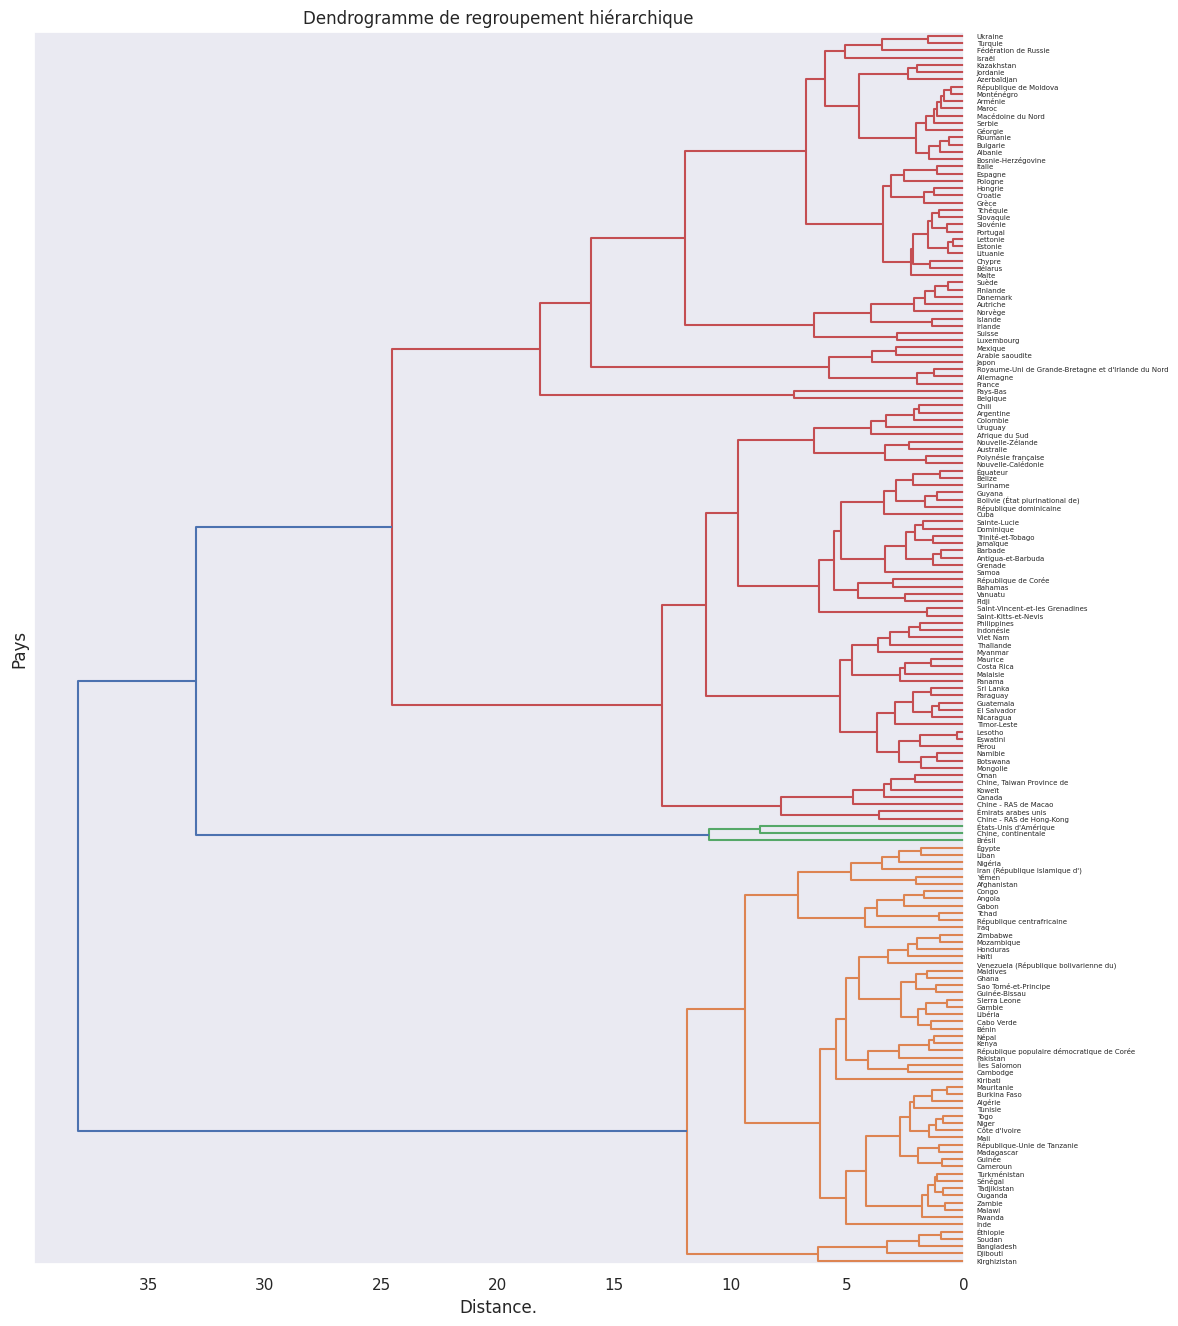

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left') #truncate_mode="lastp"

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Distance.")
plt.ylabel("Pays")
plt.show()

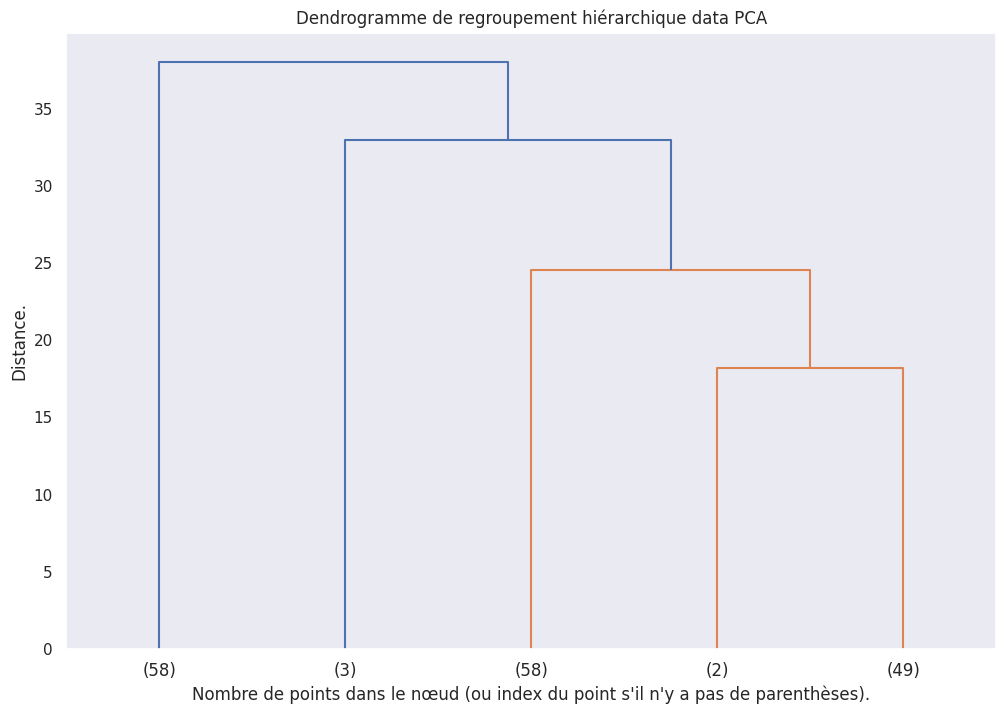

In [193]:
# on affiche 5 groupes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp")

plt.title("Dendrogramme de regroupement hiérarchique data PCA")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()


In [194]:
#Identification des 5 groupes obtenus
groupes_cah_pca = fcluster(Z, 5, criterion='maxclust')
#Index trié des groupes
idg = np.argsort(groupes_cah_pca)
#Affichage des pays selon leurs groupes
df_groupes_cah_pca = pd.DataFrame(df_compo.index[idg], groupes_cah_pca[idg]).reset_index()
df_groupes_cah_pca = df_groupes_cah_pca.rename(columns={'index':'cluster'})



In [195]:
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah_pca = pd.merge(df_compo, df_groupes_cah_pca, on='Zone')

In [196]:
#Aperçu des 5 premières lignes
df_groupes_cah_pca.head()



Zone        F1        F2        F3        F4        F5        F6  \
0     Afghanistan -1.684645  3.118661  0.393578  2.611101 -0.365360 -0.937109   
1  Afrique du Sud  1.356491  0.245971  0.752702  1.277400 -1.114366  0.066469   
2         Albanie -0.416865 -1.389510 -1.037761 -0.248676 -0.099039 -0.679882   
3         Algérie -1.246691  0.576964 -1.938070  0.693048 -0.853812  0.252762   
4       Allemagne  2.694422 -2.458671 -0.286636  2.135935  0.165997 -0.737478   

         F7  cluster  
0  0.524388        1  
1 -0.307680        3  
2  0.318374        5  
3 -0.403177        1  
4 -1.820733        5

In [197]:
# on donne un nom à chaque groupe
df_groupe1_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 1]
df_groupe2_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 2]
df_groupe3_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 3]
df_groupe4_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 4]
df_groupe5_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 5]

In [198]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
df_groupes_cah_pca.groupby('cluster').mean().applymap(lambda x: '{:.2f}'.format(x))


<ipython-input-198-c6d0fd58c8e2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupes_cah_pca.groupby('cluster').mean().applymap(lambda x: '{:.2f}'.format(x))


F1     F2     F3     F4     F5     F6     F7
cluster                                                 
1        -1.16   1.21  -0.70   0.19   0.15   0.00  -0.17
2        12.33   4.69  -2.12  -1.31   0.16   0.32   0.30
3        -0.02   0.19   1.40  -0.28  -0.13   0.24   0.31
4         2.26  -3.89  -1.73   4.53   4.81   4.52   1.50
5         0.55  -1.78  -0.63  -0.00  -0.23  -0.50  -0.24

In [199]:
#df_groupes_cah_pca.rename(columns={'F1' : 'Disponibilité alimentaire', 'F2' : 'Niveau de développement','F3' : 'Diversité alimentaire' , 'F4' : 'Evolution économique', 'F5' : 'Instabilité économique', 'F6' : 'Dépendence alimentaire', 'F7' : 'Compétitivité alimentaire'}, inplace=True)

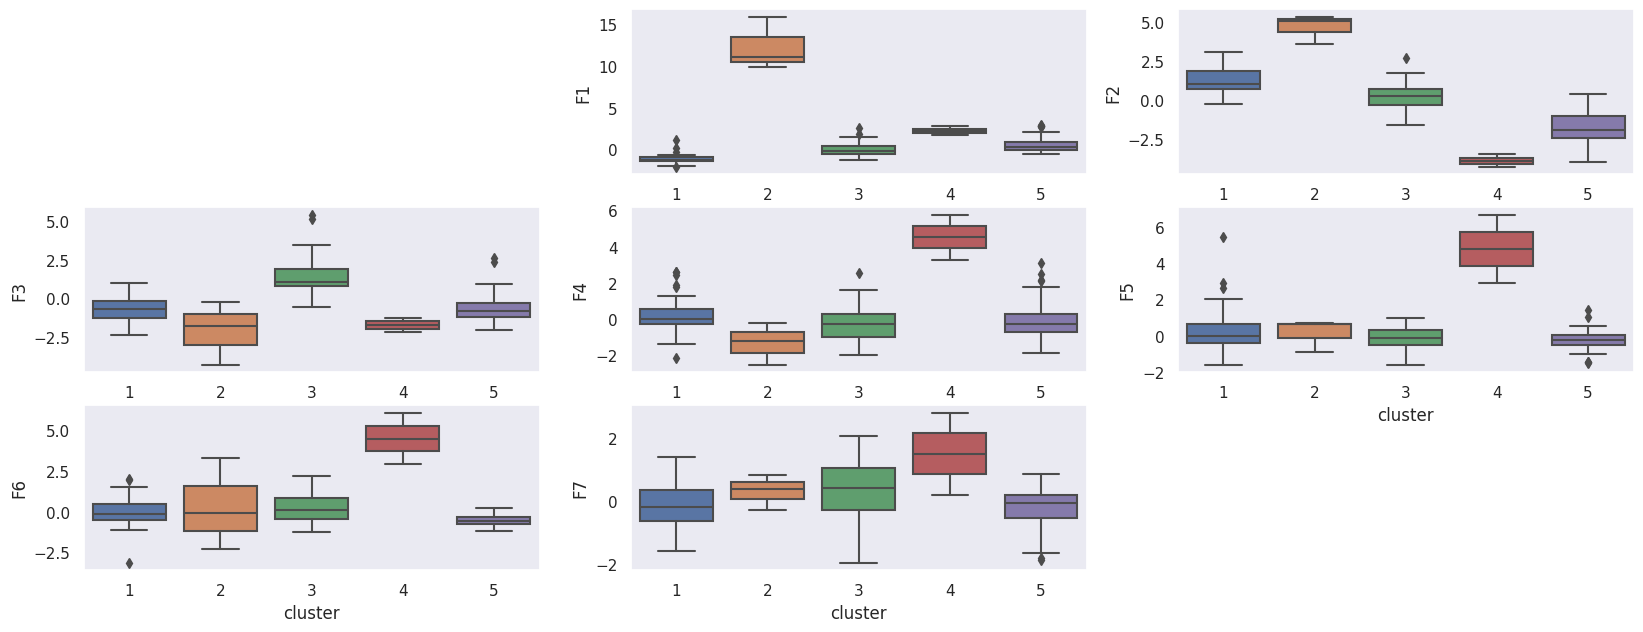

In [200]:
Affichage_boxplot(df_groupes_cah_pca,1,8)

In [201]:
#affichage des noms des pays dans chaque groupes (à partir de la table pca)
print('Groupe1')
print(df_groupe1_cah_pca['Zone'].unique())
print('Nombre de pays :', len(df_groupe1_cah_pca))
print('____________________________________________________________')
print('Groupe2')
print(df_groupe2_cah_pca['Zone'].unique())
print('Nombre de pays :',len(df_groupe2_cah_pca))
print('____________________________________________________________')
print('Groupe3')
print(df_groupe3_cah_pca['Zone'].unique())
print('Nombre de pays :',len(df_groupe3_cah_pca))
print('____________________________________________________________')
print('Groupe4')
print(df_groupe4_cah_pca['Zone'].unique())
print('Nombre de pays :',len(df_groupe4_cah_pca))
print('____________________________________________________________')
print('Groupe5')
print(df_groupe5_cah_pca['Zone'].unique())
print('Nombre de pays :',len(df_groupe5_cah_pca))
print('____________________________________________________________')

Groupe1
['Afghanistan' 'Algérie' 'Angola' 'Bangladesh' 'Burkina Faso' 'Bénin'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Congo' "Côte d'Ivoire" 'Djibouti'
 'Gabon' 'Gambie' 'Ghana' 'Guinée' 'Guinée-Bissau' 'Haïti' 'Honduras'
 'Inde' "Iran (République islamique d')" 'Iraq' 'Kenya' 'Kirghizistan'
 'Kiribati' 'Liban' 'Libéria' 'Madagascar' 'Malawi' 'Maldives' 'Mali'
 'Mauritanie' 'Mozambique' 'Niger' 'Nigéria' 'Népal' 'Ouganda' 'Pakistan'
 'Rwanda' 'République centrafricaine'
 'République populaire démocratique de Corée'
 'République-Unie de Tanzanie' 'Sao Tomé-et-Principe' 'Sierra Leone'
 'Soudan' 'Sénégal' 'Tadjikistan' 'Tchad' 'Togo' 'Tunisie' 'Turkménistan'
 'Venezuela (République bolivarienne du)' 'Yémen' 'Zambie' 'Zimbabwe'
 'Égypte' 'Éthiopie' 'Îles Salomon']
Nombre de pays : 58
____________________________________________________________
Groupe2
['Brésil' 'Chine, continentale' "États-Unis d'Amérique"]
Nombre de pays : 3
____________________________________________________________
Groupe

In [202]:
# affichage des pays n'important pas de poulet
df[df['Importations - Quantité']==0]

Quantite_exporte_de_france  \
Zone                                                                     
Bangladesh                                                     61790.0   
Belize                                                             0.0   
Burkina Faso                                                    1100.0   
Cameroun                                                        3840.0   
Guyana                                                             0.0   
Inde                                                               0.0   
Israël                                                          2400.0   
Kenya                                                           1220.0   
Madagascar                                                        20.0   
Malawi                                                             0.0   
Nigéria                                                            0.0   
Népal                                                              0.0   
Ouganda                                                            0.0   
Rwanda                                                             0.0   
République populaire démocratique de Corée                         0.0   
Sri Lanka                                                          0.0   
Sénégal                                                         2140.0   
Tunisie                                                        43030.0   
Équateur                                                           0.0   

                                            Stabilite_politique  \
Zone                                                              
Bangladesh                                                -1.26   
Belize                                                     0.04   
Burkina Faso                                              -0.93   
Cameroun                                                  -1.10   
Guyana                                                    -0.04   
Inde                                                      -0.76   
Israël                                                    -0.89   
Kenya                                                     -1.13   
Madagascar                                                -0.30   
Malawi                                                    -0.25   
Nigéria                                                   -2.00   
Népal                                                     -0.69   
Ouganda                                                   -0.57   
Rwanda                                                     0.09   
République populaire démocratique de Corée                -0.50   
Sri Lanka                                                 -0.07   
Sénégal                                                   -0.05   
Tunisie                                                   -1.02   
Équateur                                                  -0.07   

                                            PIB_par_hab_2017_euro  \
Zone                                                                
Bangladesh                                                1706.67   
Belize                                                    5734.94   
Burkina Faso                                               668.51   
Cameroun                                                  1391.07   
Guyana                                                    5847.72   
Inde                                                      1840.49   
Israël                                                   38647.89   
Kenya                                                     1575.43   
Madagascar                                                 473.29   
Malawi                                                     470.16   
Nigéria                                                   1825.37   
Népal                                                      966.29   
Ouganda                                                    720.21   
Rwanda                                        

# Détermination d'un score globale pour chaque pays

In [203]:
# on va commenscer par normaliser les donnés en utilisant minmaxscaler de la librairie sklearn

scaler = MinMaxScaler()
dfnorm = scaler.fit_transform(df)
dfnorm = pd.DataFrame(dfnorm)
dfnorm.index = df.index
dfnorm.columns = df.columns
dfnorm

Quantite_exporte_de_france  Stabilite_politique  \
Zone                                                                     
Afghanistan                              0.000000             0.030905   
Afrique du Sud                           0.000000             0.587196   
Albanie                                  0.000006             0.732892   
Algérie                                  0.000725             0.445916   
Allemagne                                0.018492             0.779249   
...                                           ...                  ...   
Émirats arabes unis                      0.000000             0.785872   
Équateur                                 0.000000             0.633554   
États-Unis d'Amérique                    0.000000             0.724062   
Éthiopie                                 0.000000             0.278146   
Îles Salomon                             0.000000             0.693157   

                       PIB_par_hab_2017_euro  Evolution PIB/Habitant  \
Zone                                                                   
Afghanistan                         0.001051                0.136251   
Afrique du Sud                      0.057568                0.146067   
Albanie                             0.037496                0.243555   
Algérie                             0.033888                0.111164   
Allemagne                           0.402974                0.224062   
...                                      ...                     ...   
Émirats arabes unis                 0.388503                0.204803   
Équateur                            0.053122                0.256924   
États-Unis d'Amérique               0.541937                0.279749   
Éthiopie                            0.003106                0.476986   
Îles Salomon                        0.017024                0.254451   

                       Dispo_alim(Kg/Pers/an)  Disponibilité intérieure  \
Zone                                                                      
Afghanistan                          0.019396                  0.003011   
Afrique du Sud                       0.492657                  0.115856   
Albanie                              0.224855                  0.002464   
Algérie                              0.086589                  0.015057   
Allemagne                            0.267941                  0.095105   
...                                       ...                       ...   
Émirats arabes unis                  0.600443                  0.022449   
Équateur                             0.265725                  0.018561   
États-Unis d'Amérique                0.769604                  1.000000   
Éthiopie                             0.000000                  0.000657   
Îles Salomon                         0.059850                  0.000055   

                       Exportations - Quantité  Importations - Quantité  \
Zone                                                                      
Afghanistan                           0.031301                 0.027128   
Afrique du Sud                        0.014918                 0.480823   
Albanie                               0.000000                 0.035547   
Algérie                               0.000000                 0.001871   
Allemagne                             0.152972                 0.787652   
...                                        ...                      ...   
Émirats arabes unis                   0.022259                 0.405051   
Équateur                              0.000000                 0.000000   
États-Unis d'Amérique                 0.874260                 0.115061   
Éthiopie                              0.031301                 0.000935   
Îles Salomon                          0.000000                 0.005613   

                       Nourriture_total  Production  Distance_france  \
Zone                                                                   
Afghanistan                

On calcul le score avec les poids suivants:
- Stabilité politique : 5
- Importations : 5
- PIB/habitant : 4
- Doing business : 4
- Exportations : 3
- Production : 2
- Evolution PIB :2
- Disponibilité alimentaire : 1
- Disponibilité intérieure : 1
- Nourriture totale :1
- Droit de Douane : 1
- Taux d'impot sur vente : 1
- Quantité exporté de France :0.5
- Distance France : 0.5
- TVA : 0.5

In [204]:
#calcul du score par application des poids donnés à chaque notion en fonction de leurs importances
dfnorm['Score']=dfnorm['Stabilite_politique']*5 + dfnorm['Importations - Quantité']*5 + dfnorm['PIB_par_hab_2017_euro']*4 + dfnorm['Doing_business_index']*4 + dfnorm['Exportations - Quantité']*3+ dfnorm['Evolution PIB/Habitant']*2 + dfnorm['Dispo_alim(Kg/Pers/an)']*1 + dfnorm['Disponibilité intérieure']*1 + dfnorm['Nourriture_total']*1-dfnorm['Droit de douane']*1 - dfnorm['taux_impot_sur_vente']*1+dfnorm['Quantite_exporte_de_france'] * 0.5 + dfnorm['Distance_france']*0.5-dfnorm['tva']*0.5
dfnorm.sort_values(by='Score', axis=0, ascending=False, inplace=True)

dfnorm

Quantite_exporte_de_france  Stabilite_politique  \
Zone                                                                         
États-Unis d'Amérique                    0.000000e+00             0.724062   
Chine - RAS de Hong-Kong                 0.000000e+00             0.832230   
Japon                                    5.631336e-07             0.894040   
Allemagne                                1.849176e-02             0.779249   
Pays-Bas                                 4.285956e-01             0.852097   
...                                               ...                  ...   
Soudan                                   0.000000e+00             0.211921   
Afghanistan                              0.000000e+00             0.030905   
Tchad                                    4.927419e-06             0.364238   
République centrafricaine                1.222000e-04             0.205298   
Yémen                                    0.000000e+00             0.000000   

                           PIB_par_hab_2017_euro  Evolution PIB/Habitant  \
Zone                                                                       
États-Unis d'Amérique                   0.541937                0.279749   
Chine - RAS de Hong-Kong                0.416709                0.319839   
Japon                                   0.349971                0.132531   
Allemagne                               0.402974                0.224062   
Pays-Bas                                0.439617                0.205583   
...                                          ...                     ...   
Soudan                                  0.025269                0.527561   
Afghanistan                             0.001051                0.136251   
Tchad                                   0.002260                0.089765   
République centrafricaine               0.000000                0.131925   
Yémen                                   0.004363                0.081072   

                           Dispo_alim(Kg/Pers/an)  Disponibilité intérieure  \
Zone                                                                          
États-Unis d'Amérique                    0.769604                  1.000000   
Chine - RAS de Hong-Kong                 0.739540                  0.015221   
Japon                                    0.254503                  0.132118   
Allemagne                                0.267941                  0.095105   
Pays-Bas                                 0.279856                  0.020258   
...                                           ...                       ...   
Soudan                                   0.020366                  0.003668   
Afghanistan                              0.019396                  0.003011   
Tchad                                    0.004433                  0.000274   
République centrafricaine                0.029925                  0.000493   
Yémen                                    0.116376                  0.013360   

                           Exportations - Quantité  Importations - Quantité  \
Zone                                                                          
États-Unis d'Amérique                     0.874260                 0.115061   
Chine - RAS de Hong-Kong                  0.156997                 0.848457   
Japon                                     0.002368                 1.000000   
Allemagne                                 0.152972                 0.787652   
Pays-Bas                                  0.335780                 0.568756   
...                                            ...                      ...   
Soudan                                    0.031301                 0.001871   
Afghanistan                               0.031301                 0.027128   
Tchad                                     0.000000                 0.000935   
République centrafricaine                 0.031301                 0.003742   
Yémen                                     0.000